# CA 01 Machine Learning for Business

### Hugo Guimaraes Gontijo

https://github.com/HugoGontijo/Machine-Learning-for-Business

Dataset imported: from https://www.kaggle.com/datasets/dongeorge/seed-from-uci?resource=download

Assessment Task

Students are advised to review and adhere to the submission requirements documented after the assessment task.
This is an individual project using the PYTHON programming language. Develop and deploy machine learning models in any one of the following areas only and analyse the results.

– Agriculture, Fisheries and Forestry and Food

– Housing and Zoning

– Stock market dataset from only website: https://finance.yahoo.com/quote/CSV/history/

The dataset should have a decent number of rows and columns (for example, type of variables may be categorical, continuous, and discrete) after cleaning to justify the use of the machine learning modelling approach. The type of question(s) that you should formulate for the project will depend on the chosen domain of the dataset as mentioned above.

Project questions could be: (this is a small, suggested, sample of questions, other questions may be more appropriate to your project)

– How to measure similarity or dissimilarity between different clusters?

– Which clustering solution do you prefer, and why?

– How to analyse and investigate an inflation rate for a specific product from the provided time series dataset?

You will present their findings and defend the results in the report (MS Doc). Your report should capture the following aspects that are relevant to your project investigations. All implementations are carried in Jupyter notebook and no Python files will be accepted.

I) A precise introduction, motivation, description of problem domain, project objectives and the rationale for the chosen dataset in the above-mentioned areas. (15 marks)

II) Which clustering algorithms would you consider for segmentation, and why? Implement the solutions and discuss the differences between silhouette score and Davies-Bouldin index in the context of clustering. Compare the results obtained from any two clustering algorithms from the chosen dataset. (30 marks)

III) Implement your solutions and discuss what insights can you derive from the initial exploration of the time series data based on the provided topics? Describe any trends, seasonality, or anomalies observed. How did you determine the appropriate parameters (p, d, q) for the ARIMA model. Evaluate the performance of the ARIMA model in forecasting future values, highlighting any strengths and limitations based on your chosen dataset. (30 marks)

IV) Interpret and justify the results based on the problem specification or project objectives by using suitable visualizations. Comments and description of Python code, conclusions of the project should be specified in the report as well as jupyter notebook. Citations and references should be in the Harvard Style. Record a video to explain and justify your report and the code in the Jupyter notebook and the duration of the video should not be more than 7 minutes. (25 marks)

Note: You can choose two different datasets for task (ii) or task (iii) separately or one dataset for both tasks

In [6]:
%matplotlib inline 
import numpy as np 
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
sns.set()

In [7]:
df = pd.read_csv("Seed_Data.csv")

In [8]:
pd.set_option('display.max_columns', None)

In [9]:
df.head(10)

A      P       C     LK     WK  A_Coef    LKG  target
0  15.26  14.84  0.8710  5.763  3.312   2.221  5.220       0
1  14.88  14.57  0.8811  5.554  3.333   1.018  4.956       0
2  14.29  14.09  0.9050  5.291  3.337   2.699  4.825       0
3  13.84  13.94  0.8955  5.324  3.379   2.259  4.805       0
4  16.14  14.99  0.9034  5.658  3.562   1.355  5.175       0
5  14.38  14.21  0.8951  5.386  3.312   2.462  4.956       0
6  14.69  14.49  0.8799  5.563  3.259   3.586  5.219       0
7  14.11  14.10  0.8911  5.420  3.302   2.700  5.000       0
8  16.63  15.46  0.8747  6.053  3.465   2.040  5.877       0
9  16.44  15.25  0.8880  5.884  3.505   1.969  5.533       0

In [10]:
df.tail(10)

A      P       C     LK     WK  A_Coef    LKG  target
200  12.38  13.44  0.8609  5.219  2.989   5.472  5.045       2
201  12.67  13.32  0.8977  4.984  3.135   2.300  4.745       2
202  11.18  12.72  0.8680  5.009  2.810   4.051  4.828       2
203  12.70  13.41  0.8874  5.183  3.091   8.456  5.000       2
204  12.37  13.47  0.8567  5.204  2.960   3.919  5.001       2
205  12.19  13.20  0.8783  5.137  2.981   3.631  4.870       2
206  11.23  12.88  0.8511  5.140  2.795   4.325  5.003       2
207  13.20  13.66  0.8883  5.236  3.232   8.315  5.056       2
208  11.84  13.21  0.8521  5.175  2.836   3.598  5.044       2
209  12.30  13.34  0.8684  5.243  2.974   5.637  5.063       2

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       210 non-null    float64
 1   P       210 non-null    float64
 2   C       210 non-null    float64
 3   LK      210 non-null    float64
 4   WK      210 non-null    float64
 5   A_Coef  210 non-null    float64
 6   LKG     210 non-null    float64
 7   target  210 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 13.3 KB


This dataset contains three different varieties of wheat:

	0. Kama
	1. Rosa
	2. Canadian

In [13]:
df.columns

Index(['A', 'P', 'C', 'LK', 'WK', 'A_Coef', 'LKG', 'target'], dtype='object')

In [14]:
df = df.rename(columns={'A': 'Area', 'P': 'Perimeter', 'C': 'Compacteness', 'LK': 'Length K', 'WK': 'Width K', 'A_Coef': 'Asymmetry', 'LKG': 'Length Groove', 'target': 'Wheat Specie'})

In [15]:
df_original = df.copy()

In [16]:
df_test = df.copy()

In [17]:
df_fuzzy = df.copy()

In [18]:
df_op = df.copy()

In [19]:
df_test.columns

Index(['Area', 'Perimeter', 'Compacteness', 'Length K', 'Width K', 'Asymmetry',
       'Length Groove', 'Wheat Specie'],
      dtype='object')

In [20]:
df_test = df_test.drop(columns=['Area', 'Perimeter', 'Compacteness', 'Asymmetry',
       'Length Groove', 'Wheat Specie'])

In [21]:
df_test.head()

Length K  Width K
0     5.763    3.312
1     5.554    3.333
2     5.291    3.337
3     5.324    3.379
4     5.658    3.562

In [22]:
df.head()

Area  Perimeter  Compacteness  Length K  Width K  Asymmetry  \
0  15.26      14.84        0.8710     5.763    3.312      2.221   
1  14.88      14.57        0.8811     5.554    3.333      1.018   
2  14.29      14.09        0.9050     5.291    3.337      2.699   
3  13.84      13.94        0.8955     5.324    3.379      2.259   
4  16.14      14.99        0.9034     5.658    3.562      1.355   

   Length Groove  Wheat Specie  
0          5.220             0  
1          4.956             0  
2          4.825             0  
3          4.805             0  
4          5.175             0

In [23]:
df.describe()

Area   Perimeter  Compacteness    Length K     Width K  \
count  210.000000  210.000000    210.000000  210.000000  210.000000   
mean    14.847524   14.559286      0.870999    5.628533    3.258605   
std      2.909699    1.305959      0.023629    0.443063    0.377714   
min     10.590000   12.410000      0.808100    4.899000    2.630000   
25%     12.270000   13.450000      0.856900    5.262250    2.944000   
50%     14.355000   14.320000      0.873450    5.523500    3.237000   
75%     17.305000   15.715000      0.887775    5.979750    3.561750   
max     21.180000   17.250000      0.918300    6.675000    4.033000   

        Asymmetry  Length Groove  Wheat Specie  
count  210.000000     210.000000    210.000000  
mean     3.700201       5.408071      1.000000  
std      1.503557       0.491480      0.818448  
min      0.765100       4.519000      0.000000  
25%      2.561500       5.045000      0.000000  
50%      3.599000       5.223000      1.000000  
75%      4.768750       5.877000      2.000000  
max      8.456000       6.550000      2.000000

In [24]:
species_mapping = {0: 'Kama', 1: 'Rosa', 2: 'Canadian'}

df['Wheat Specie'] = df['Wheat Specie'].map(species_mapping)

In [25]:
df.head()

Area  Perimeter  Compacteness  Length K  Width K  Asymmetry  \
0  15.26      14.84        0.8710     5.763    3.312      2.221   
1  14.88      14.57        0.8811     5.554    3.333      1.018   
2  14.29      14.09        0.9050     5.291    3.337      2.699   
3  13.84      13.94        0.8955     5.324    3.379      2.259   
4  16.14      14.99        0.9034     5.658    3.562      1.355   

   Length Groove Wheat Specie  
0          5.220         Kama  
1          4.956         Kama  
2          4.825         Kama  
3          4.805         Kama  
4          5.175         Kama

In [26]:
x = df.iloc[:, [0, 1, 2, 3, 4, 5, 6]].values

In [27]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 3, max_iter = 300, n_init = 10, random_state = 38)

y_kmeans = kmeans.fit_predict(x)

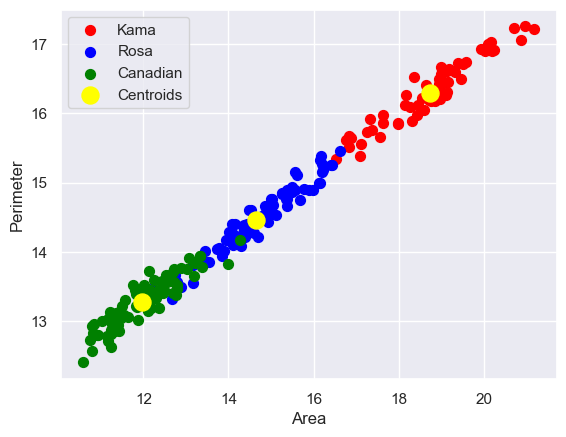

In [28]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 50, c = 'red', label = 'Kama')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 50, c = 'blue', label = 'Rosa')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 50, c = 'green', label = 'Canadian')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 150, c = 'yellow', label = 'Centroids')
plt.xlabel('Area')
plt.ylabel('Perimeter')

plt.legend( loc ="best") 

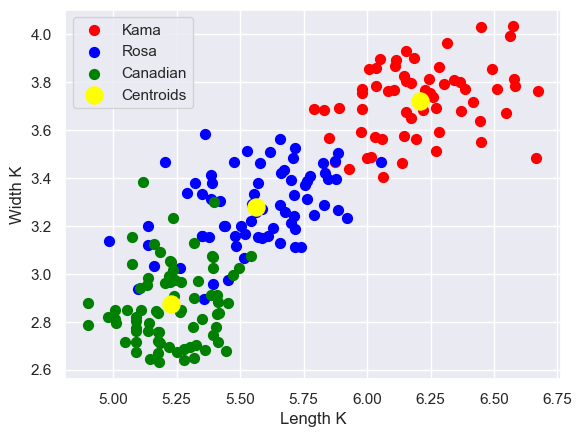

In [29]:
plt.scatter(x[y_kmeans == 0, 3], x[y_kmeans == 0, 4], s = 50, c = 'red', label = 'Kama')
plt.scatter(x[y_kmeans == 1, 3], x[y_kmeans == 1, 4], s = 50, c = 'blue', label = 'Rosa')
plt.scatter(x[y_kmeans == 2, 3], x[y_kmeans == 2, 4], s = 50, c = 'green', label = 'Canadian')

plt.scatter(kmeans.cluster_centers_[:, 3], kmeans.cluster_centers_[:,4], s = 150, c = 'yellow', label = 'Centroids')
plt.xlabel('Length K')
plt.ylabel('Width K')

plt.legend( loc ="best") 

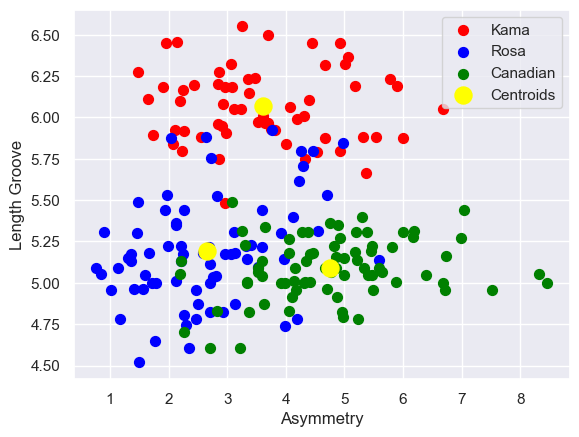

In [30]:
plt.scatter(x[y_kmeans == 0, 5], x[y_kmeans == 0, 6], s = 50, c = 'red', label = 'Kama')
plt.scatter(x[y_kmeans == 1, 5], x[y_kmeans == 1, 6], s = 50, c = 'blue', label = 'Rosa')
plt.scatter(x[y_kmeans == 2, 5], x[y_kmeans == 2, 6], s = 50, c = 'green', label = 'Canadian')

plt.scatter(kmeans.cluster_centers_[:, 5], kmeans.cluster_centers_[:,6], s = 150, c = 'yellow', label = 'Centroids')
plt.xlabel('Asymmetry')
plt.ylabel('Length Groove')

plt.legend( loc ="best") 

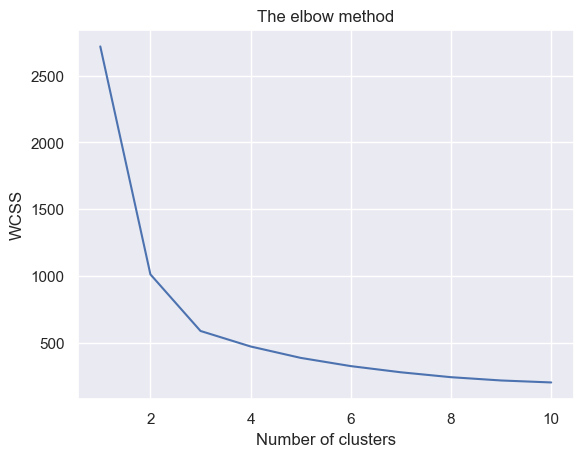

In [31]:
from sklearn.cluster import KMeans
wcss = []                  

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, max_iter = 300, n_init = 10, random_state = 0)  
    
    kmeans.fit(x)                                                                   
    wcss.append(kmeans.inertia_)                                                    


plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')    
plt.show()

In [32]:
from sklearn.metrics import silhouette_score

print(f'Silhouette Score(n = 3): {silhouette_score(x, y_kmeans)}')

Silhouette Score(n = 3): 0.4719337319126895


In [33]:
!pip install plotly

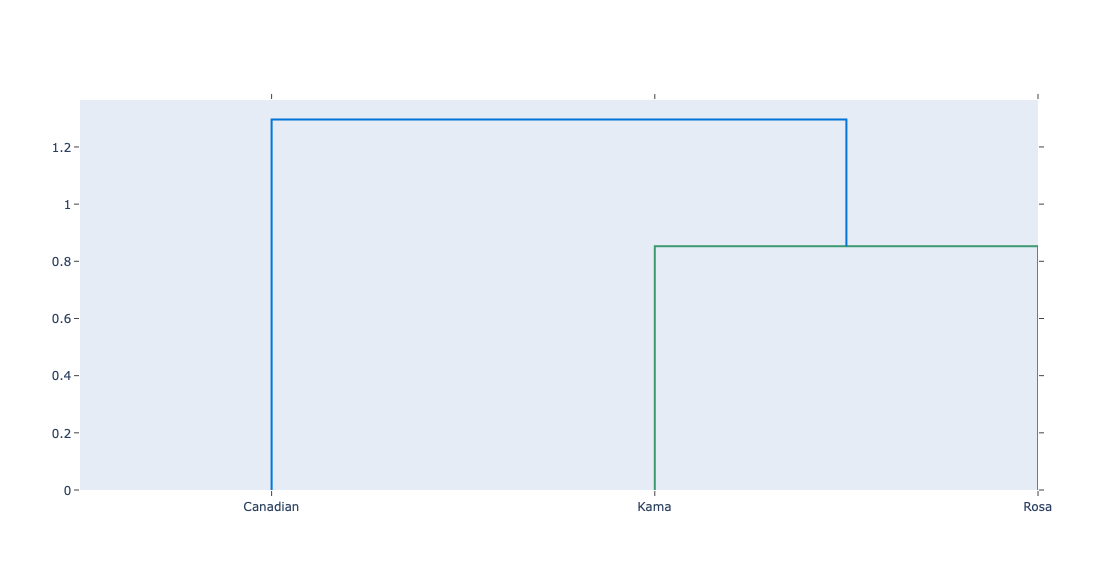

In [34]:
from plotly.figure_factory import create_dendrogram 
import numpy as np 
  
X = np.random.rand(3,3) 
Species = ['Kama', 'Rosa', 'Canadian'] 
  
dendro = create_dendrogram(X, orientation = 'bottom', labels = Species) 
dendro.update_layout({'width':700, 'height':570})  
dendro.show()

In [35]:
X = df.iloc[:, [0, 1]].values  

df.head()

Area  Perimeter  Compacteness  Length K  Width K  Asymmetry  \
0  15.26      14.84        0.8710     5.763    3.312      2.221   
1  14.88      14.57        0.8811     5.554    3.333      1.018   
2  14.29      14.09        0.9050     5.291    3.337      2.699   
3  13.84      13.94        0.8955     5.324    3.379      2.259   
4  16.14      14.99        0.9034     5.658    3.562      1.355   

   Length Groove Wheat Specie  
0          5.220         Kama  
1          4.956         Kama  
2          4.825         Kama  
3          4.805         Kama  
4          5.175         Kama

In [36]:
print(X)

[[15.26 14.84]
 [14.88 14.57]
 [14.29 14.09]
 [13.84 13.94]
 [16.14 14.99]
 [14.38 14.21]
 [14.69 14.49]
 [14.11 14.1 ]
 [16.63 15.46]
 [16.44 15.25]
 [15.26 14.85]
 [14.03 14.16]
 [13.89 14.02]
 [13.78 14.06]
 [13.74 14.05]
 [14.59 14.28]
 [13.99 13.83]
 [15.69 14.75]
 [14.7  14.21]
 [12.72 13.57]
 [14.16 14.4 ]
 [14.11 14.26]
 [15.88 14.9 ]
 [12.08 13.23]
 [15.01 14.76]
 [16.19 15.16]
 [13.02 13.76]
 [12.74 13.67]
 [14.11 14.18]
 [13.45 14.02]
 [13.16 13.82]
 [15.49 14.94]
 [14.09 14.41]
 [13.94 14.17]
 [15.05 14.68]
 [16.12 15.  ]
 [16.2  15.27]
 [17.08 15.38]
 [14.8  14.52]
 [14.28 14.17]
 [13.54 13.85]
 [13.5  13.85]
 [13.16 13.55]
 [15.5  14.86]
 [15.11 14.54]
 [13.8  14.04]
 [15.36 14.76]
 [14.99 14.56]
 [14.79 14.52]
 [14.86 14.67]
 [14.43 14.4 ]
 [15.78 14.91]
 [14.49 14.61]
 [14.33 14.28]
 [14.52 14.6 ]
 [15.03 14.77]
 [14.46 14.35]
 [14.92 14.43]
 [15.38 14.77]
 [12.11 13.47]
 [11.42 12.86]
 [11.23 12.63]
 [12.36 13.19]
 [13.22 13.84]
 [12.78 13.57]
 [12.88 13.5 ]
 [14.34 14

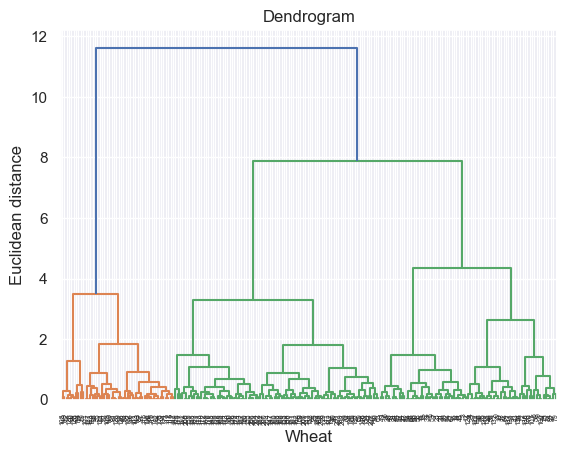

In [37]:
import scipy.cluster.hierarchy as sch

dendrogrm = sch.dendrogram(sch.linkage(X, method = 'complete'))
plt.title('Dendrogram')
plt.xlabel('Wheat')
plt.ylabel('Euclidean distance')
plt.show()

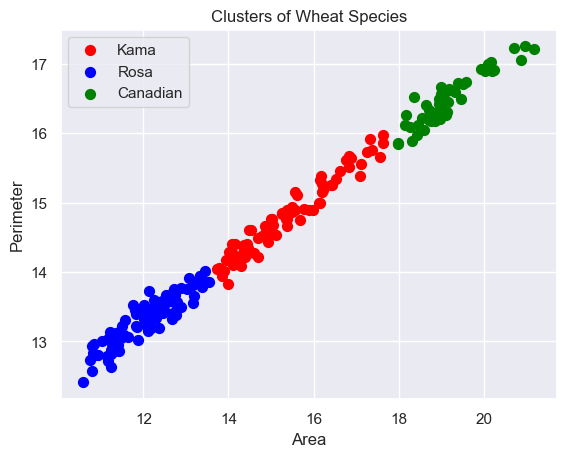

In [38]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters = 3, metric = 'euclidean', linkage = 'ward')

y_hc = hc.fit_predict(X)

# Visualising the clusters
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 50, c = 'red', label = 'Kama')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 50, c = 'blue', label = 'Rosa')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 50, c = 'green', label = 'Canadian')
plt.title('Clusters of Wheat Species')
plt.xlabel('Area')
plt.ylabel('Perimeter')
plt.legend()
plt.show()

In [39]:
X = df.iloc[:, [3, 4]].values  

df.head()

Area  Perimeter  Compacteness  Length K  Width K  Asymmetry  \
0  15.26      14.84        0.8710     5.763    3.312      2.221   
1  14.88      14.57        0.8811     5.554    3.333      1.018   
2  14.29      14.09        0.9050     5.291    3.337      2.699   
3  13.84      13.94        0.8955     5.324    3.379      2.259   
4  16.14      14.99        0.9034     5.658    3.562      1.355   

   Length Groove Wheat Specie  
0          5.220         Kama  
1          4.956         Kama  
2          4.825         Kama  
3          4.805         Kama  
4          5.175         Kama

In [40]:
print(X)

[[5.763 3.312]
 [5.554 3.333]
 [5.291 3.337]
 [5.324 3.379]
 [5.658 3.562]
 [5.386 3.312]
 [5.563 3.259]
 [5.42  3.302]
 [6.053 3.465]
 [5.884 3.505]
 [5.714 3.242]
 [5.438 3.201]
 [5.439 3.199]
 [5.479 3.156]
 [5.482 3.114]
 [5.351 3.333]
 [5.119 3.383]
 [5.527 3.514]
 [5.205 3.466]
 [5.226 3.049]
 [5.658 3.129]
 [5.52  3.168]
 [5.618 3.507]
 [5.099 2.936]
 [5.789 3.245]
 [5.833 3.421]
 [5.395 3.026]
 [5.395 2.956]
 [5.541 3.221]
 [5.516 3.065]
 [5.454 2.975]
 [5.757 3.371]
 [5.717 3.186]
 [5.585 3.15 ]
 [5.712 3.328]
 [5.709 3.485]
 [5.826 3.464]
 [5.832 3.683]
 [5.656 3.288]
 [5.397 3.298]
 [5.348 3.156]
 [5.351 3.158]
 [5.138 3.201]
 [5.877 3.396]
 [5.579 3.462]
 [5.376 3.155]
 [5.701 3.393]
 [5.57  3.377]
 [5.545 3.291]
 [5.678 3.258]
 [5.585 3.272]
 [5.674 3.434]
 [5.715 3.113]
 [5.504 3.199]
 [5.741 3.113]
 [5.702 3.212]
 [5.388 3.377]
 [5.384 3.412]
 [5.662 3.419]
 [5.159 3.032]
 [5.008 2.85 ]
 [4.902 2.879]
 [5.076 3.042]
 [5.395 3.07 ]
 [5.262 3.026]
 [5.139 3.119]
 [5.63  3.

In [41]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters = 3, metric = 'euclidean', linkage = 'ward')

y_hc = hc.fit_predict(X)

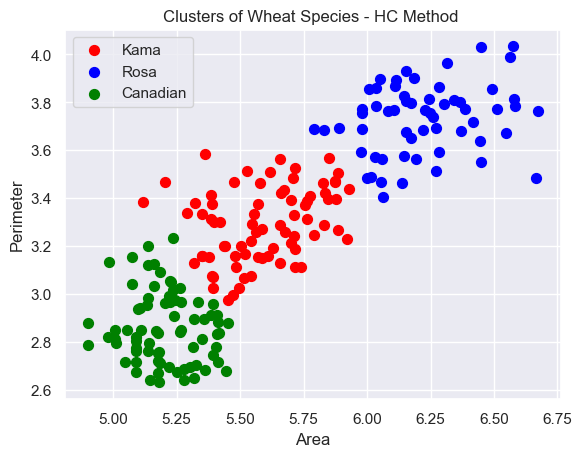

In [42]:
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 50, c = 'red', label = 'Kama')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 50, c = 'blue', label = 'Rosa')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 50, c = 'green', label = 'Canadian')
plt.title('Clusters of Wheat Species - HC Method ')
plt.xlabel('Area')
plt.ylabel('Perimeter')
plt.legend()
plt.show()

In [43]:
X = df.iloc[:, [5, 6]].values  

df.head()

Area  Perimeter  Compacteness  Length K  Width K  Asymmetry  \
0  15.26      14.84        0.8710     5.763    3.312      2.221   
1  14.88      14.57        0.8811     5.554    3.333      1.018   
2  14.29      14.09        0.9050     5.291    3.337      2.699   
3  13.84      13.94        0.8955     5.324    3.379      2.259   
4  16.14      14.99        0.9034     5.658    3.562      1.355   

   Length Groove Wheat Specie  
0          5.220         Kama  
1          4.956         Kama  
2          4.825         Kama  
3          4.805         Kama  
4          5.175         Kama

In [44]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters = 3, metric = 'euclidean', linkage = 'ward')

y_hc = hc.fit_predict(X)

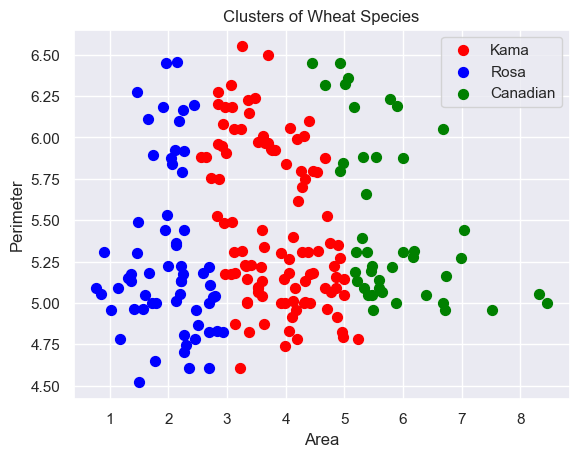

In [45]:
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 50, c = 'red', label = 'Kama')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 50, c = 'blue', label = 'Rosa')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 50, c = 'green', label = 'Canadian')
plt.title('Clusters of Wheat Species')
plt.xlabel('Area')
plt.ylabel('Perimeter')
plt.legend()
plt.show()

In [46]:
from sklearn.preprocessing import normalize

data_scaled = normalize(df_original)

data_scaled = pd.DataFrame(data_scaled, columns = df_original.columns)

data_scaled.head()

Area  Perimeter  Compacteness  Length K   Width K  Asymmetry  \
0  0.662718   0.644478      0.037826  0.250278  0.143835   0.096455   
1  0.664107   0.650272      0.039324  0.247880  0.148755   0.045434   
2  0.656884   0.647690      0.041601  0.243217  0.153395   0.124068   
3  0.649097   0.653787      0.041999  0.249696  0.158475   0.105947   
4  0.682446   0.633821      0.038198  0.239237  0.150612   0.057293   

   Length Groove  Wheat Specie  
0       0.226696           0.0  
1       0.221191           0.0  
2       0.221796           0.0  
3       0.225355           0.0  
4       0.218814           0.0

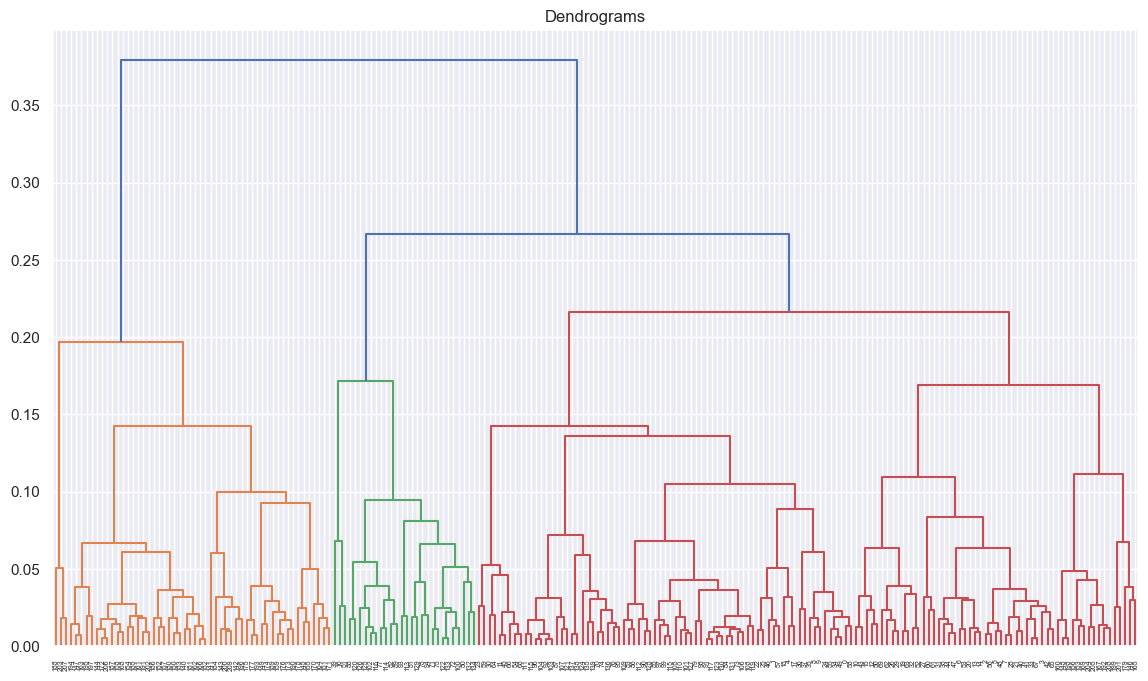

In [47]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(14, 8))  

plt.title("Dendrograms")

dend = shc.dendrogram(shc.linkage(data_scaled, method = 'complete'))

plt.axhline(y = 6, color = 'r', linestyle = '--')

In [48]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward')  

cluster.fit_predict(data_scaled)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

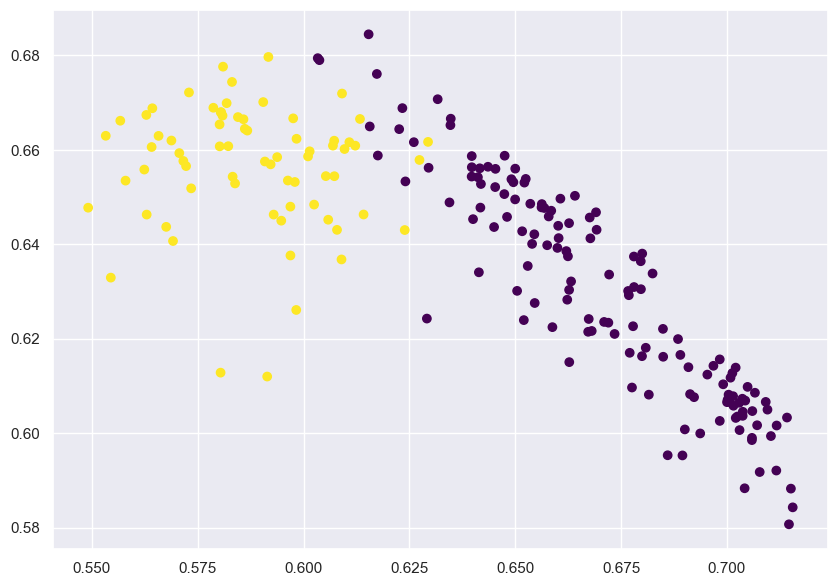

In [49]:
plt.figure(figsize=(10, 7))

plt.scatter(data_scaled['Area'], data_scaled['Perimeter'], c = cluster.labels_, cmap='viridis') 

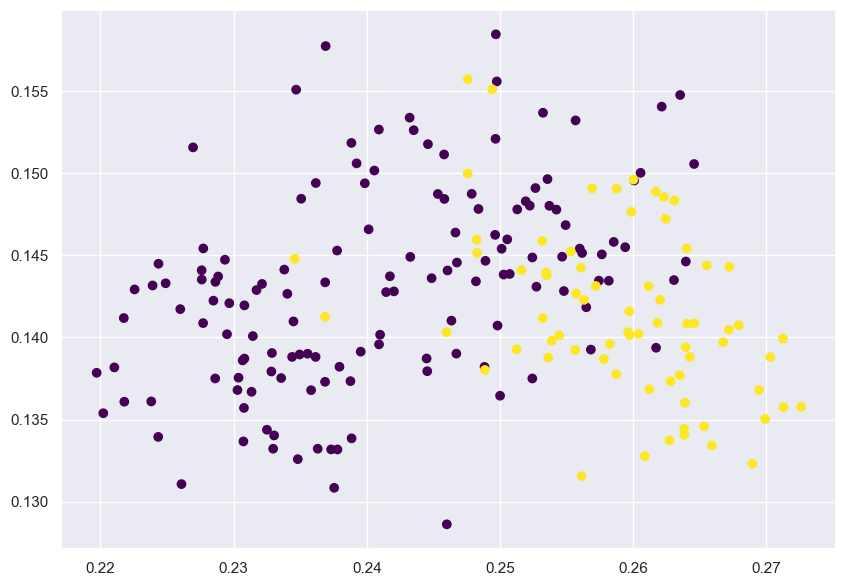

In [50]:
plt.figure(figsize=(10, 7))

plt.scatter(data_scaled['Length K'], data_scaled['Width K'], c = cluster.labels_, cmap='viridis') 

In [51]:
df.head()

Area  Perimeter  Compacteness  Length K  Width K  Asymmetry  \
0  15.26      14.84        0.8710     5.763    3.312      2.221   
1  14.88      14.57        0.8811     5.554    3.333      1.018   
2  14.29      14.09        0.9050     5.291    3.337      2.699   
3  13.84      13.94        0.8955     5.324    3.379      2.259   
4  16.14      14.99        0.9034     5.658    3.562      1.355   

   Length Groove Wheat Specie  
0          5.220         Kama  
1          4.956         Kama  
2          4.825         Kama  
3          4.805         Kama  
4          5.175         Kama

In [52]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import matplotlib

In [53]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN()

dbscan.fit(df[['Length K','Width K']])

DBSCAN()

In [54]:
df['DBSCAN_labels']=dbscan.labels_ 

df.head(100)

Area  Perimeter  Compacteness  Length K  Width K  Asymmetry  \
0   15.26      14.84        0.8710     5.763    3.312      2.221   
1   14.88      14.57        0.8811     5.554    3.333      1.018   
2   14.29      14.09        0.9050     5.291    3.337      2.699   
3   13.84      13.94        0.8955     5.324    3.379      2.259   
4   16.14      14.99        0.9034     5.658    3.562      1.355   
..    ...        ...           ...       ...      ...        ...   
95  16.87      15.65        0.8648     6.139    3.463      3.696   
96  19.31      16.59        0.8815     6.341    3.810      3.477   
97  18.98      16.57        0.8687     6.449    3.552      2.144   
98  18.17      16.26        0.8637     6.271    3.512      2.853   
99  18.72      16.34        0.8810     6.219    3.684      2.188   

    Length Groove Wheat Specie  DBSCAN_labels  
0           5.220         Kama              0  
1           4.956         Kama              0  
2           4.825         Kama              0  
3           4.805         Kama              0  
4           5.175         Kama              0  
..            ...          ...            ...  
95          5.967         Rosa              0  
96          6.238         Rosa              0  
97          6.453         Rosa              0  
98          6.273         Rosa              0  
99          6.097         Rosa              0  

[100 rows x 9 columns]

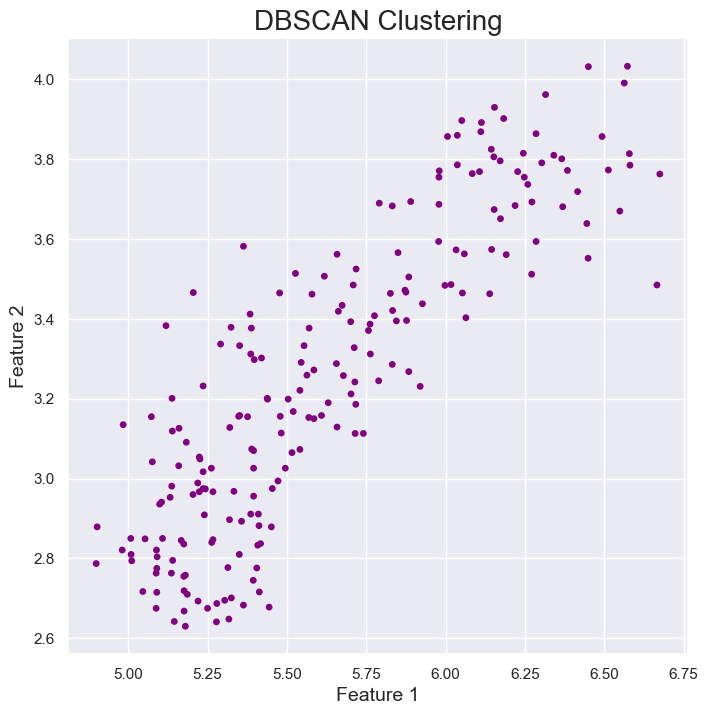

In [55]:
colors = ['purple','red','blue']

plt.figure(figsize = (8, 8))
plt.scatter(df['Length K'], df['Width K'], c = df['DBSCAN_labels'], cmap = matplotlib.colors.ListedColormap(colors), s = 15)
plt.title('DBSCAN Clustering',fontsize = 20)
plt.xlabel('Feature 1', fontsize = 14)
plt.ylabel('Feature 2', fontsize = 14)
plt.show()

In [56]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

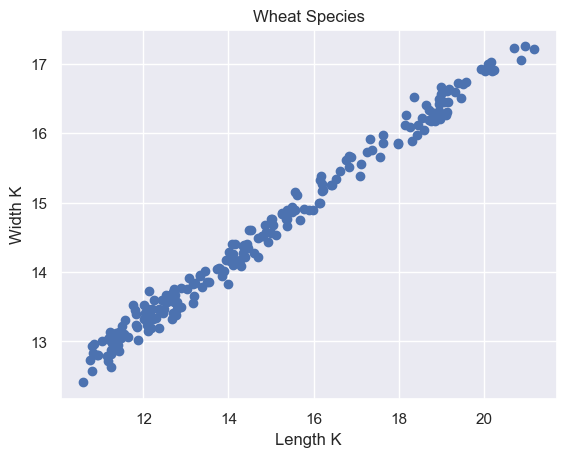

In [57]:
plt.scatter(df.values[:,0], df.values[:,1])
plt.title("Wheat Species")
plt.xlabel("Length K")
plt.ylabel("Width K")
plt.show()

In [58]:
km = KMeans(3)
km_clusters = km.fit_predict(df_test) 
ac = AgglomerativeClustering(3, linkage='average')
ac_clusters = ac.fit_predict(df_test)

In [59]:
df_test.tail(10)

Length K  Width K
200     5.219    2.989
201     4.984    3.135
202     5.009    2.810
203     5.183    3.091
204     5.204    2.960
205     5.137    2.981
206     5.140    2.795
207     5.236    3.232
208     5.175    2.836
209     5.243    2.974

In [60]:
print(ac_clusters)

[1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 2 1 1 1 2 1 1 1 2 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 1 2 2 1 1 1 2 0 0 0 0
 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 1 1 0 1 1 1 1 1 1 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1
 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2]


In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [62]:
X = StandardScaler().fit_transform(df_test)

In [63]:
eps = 0.18  
min_samples = 6  

dbscan = DBSCAN(eps=eps, min_samples=min_samples)

clusters = dbscan.fit_predict(X)

print("Clusters Label:", clusters)

Clusters Label: [ 4  5  2  2 -1  2  5  2 -1  4  0  1  1  1  1  2 -1 -1 -1  3  1  1 -1  3
  0  4 -1  6  1 -1 -1  4  0  1  4 -1  4 -1  0  2 -1 -1 -1  4 -1 -1  4 -1
  5  0  5  4 -1  1 -1  0  2 -1  4  3  8 -1 -1 -1  3  3  1  1  1  6 -1 -1
 -1 -1 -1  4 -1 -1 -1 -1  4 -1  7 -1  7 -1  7 -1 -1 -1 -1  7  7 -1 -1 -1
  7 -1 -1  7 -1 -1 -1 -1  7  7  7 -1 -1 -1  7  7 -1  7 -1 -1 -1  7  7 -1
 -1 -1  4 -1 -1 -1 -1 -1 -1 -1 -1  7 -1  4  4 -1 -1 -1 -1  4 -1 -1 -1  3
 -1  8  8  3  6  8 -1  6  6  8  8  8  8  6 -1  8  6  6  3  3  8  3  6  6
  8  8  8  8  8  8  8  8  8  8  8  6  8  3  3  8 -1  8  6  8  8 -1  8  8
  3  8  3  3  3 -1  6 -1  3 -1  8  3  3  3  8 -1  8  3]


In [64]:
n_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
print("Numeber of Clusters Found:", n_clusters)

Numeber of Clusters Found: 9


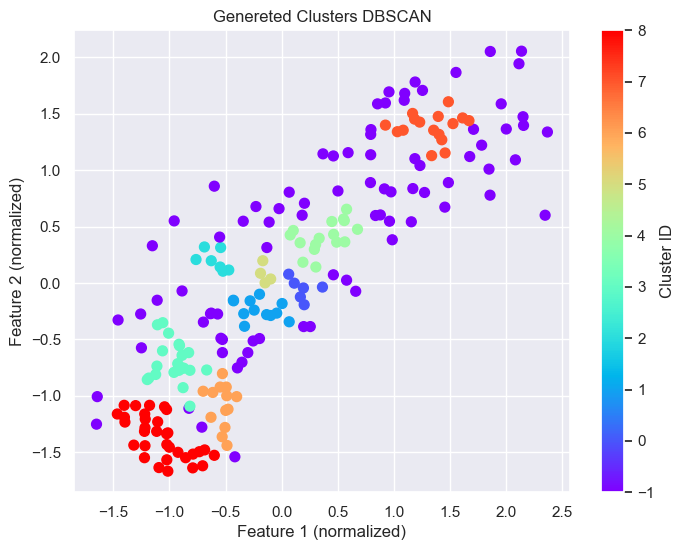

In [65]:
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='rainbow', marker='o', s=50)
plt.title('Genereted Clusters DBSCAN')
plt.xlabel('Feature 1 (normalized)')
plt.ylabel('Feature 2 (normalized)')
plt.colorbar(label='Cluster ID')
plt.show()

In [66]:
db_param_options = [[0.1,5],[0.16,5],[0.17,5],[0.18,5],[0.19,5],[0.2,5],[0.15,6],[0.16,6],[0.17,6],[0.18,6],[0.19,6],[0.2,6],[0.15,7],[0.16,7],[0.17,7],[0.18,7],[0.19,7],[0.2,7]]
for ep,min_sample in db_param_options:
    db = DBSCAN(eps=ep, min_samples = min_sample)
    db_clusters = db.fit_predict(df_test)
    print("Eps: ", ep, "Min Samples: ", min_sample)
    print("DBSCAN Clustering: ", silhouette_score(df_test, db_clusters))

Eps:  0.1 Min Samples:  5
DBSCAN Clustering:  0.02111955079193495
Eps:  0.16 Min Samples:  5
DBSCAN Clustering:  0.2359199862376435
Eps:  0.17 Min Samples:  5
DBSCAN Clustering:  0.28511580884451365
Eps:  0.18 Min Samples:  5
DBSCAN Clustering:  0.2858766307884021
Eps:  0.19 Min Samples:  5
DBSCAN Clustering:  0.2858766307884021
Eps:  0.2 Min Samples:  5
DBSCAN Clustering:  0.2858766307884021
Eps:  0.15 Min Samples:  6
DBSCAN Clustering:  0.27739283394898034
Eps:  0.16 Min Samples:  6
DBSCAN Clustering:  0.2565908200335136
Eps:  0.17 Min Samples:  6
DBSCAN Clustering:  0.28511580884451365
Eps:  0.18 Min Samples:  6
DBSCAN Clustering:  0.31048441307571284
Eps:  0.19 Min Samples:  6
DBSCAN Clustering:  0.31048441307571284
Eps:  0.2 Min Samples:  6
DBSCAN Clustering:  0.2858766307884021
Eps:  0.15 Min Samples:  7
DBSCAN Clustering:  0.28521593752695595
Eps:  0.16 Min Samples:  7
DBSCAN Clustering:  0.2565908200335136
Eps:  0.17 Min Samples:  7
DBSCAN Clustering:  0.28511580884451365
Eps: 

In [67]:
# Generate clusters using DBSCAN
db = DBSCAN(eps = 0.18, min_samples = 6)
db_clusters = db.fit_predict(df_test)

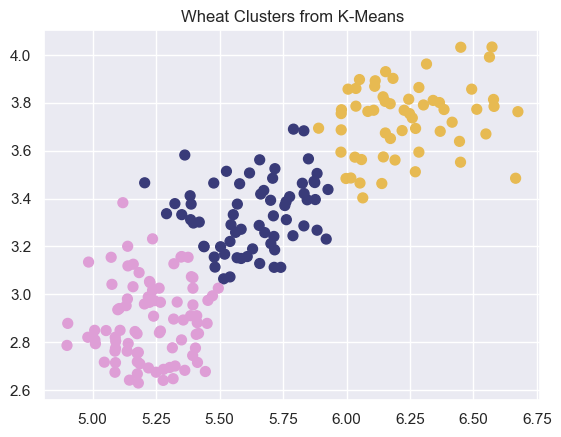

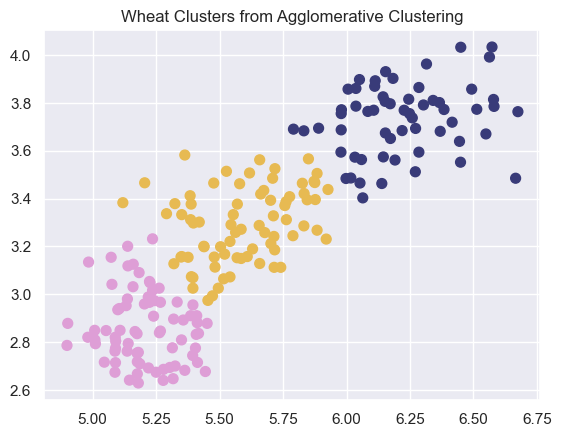

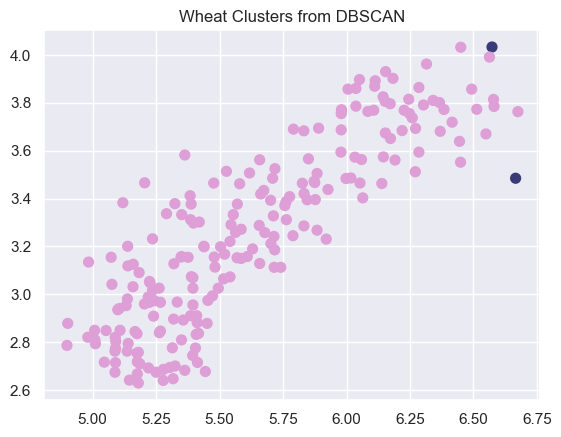

In [68]:
plt.title("Wheat Clusters from K-Means")
plt.scatter(df_test['Length K'], df_test['Width K'], c=km_clusters,s=50, cmap='tab20b')
plt.show()

plt.title("Wheat Clusters from Agglomerative Clustering")
plt.scatter(df_test['Length K'], df_test['Width K'], c=ac_clusters,s=50, cmap='tab20b')
plt.show()

plt.title("Wheat Clusters from DBSCAN")
plt.scatter(df_test['Length K'], df_test['Width K'], c=db_clusters,s=50, cmap='tab20b')
plt.show()

In [69]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

print("Silhouette Scores for Wheat Dataset:\n")
print("K-Means Clustering: ", silhouette_score(df_test, km_clusters))
print("Agg Clustering: ", silhouette_score(df_test, ac_clusters))
print("DBSCAN Clustering: ", silhouette_score(df_test, db_clusters))

print("\nDavies-Bouldin Scores:")
print("K-Means Clustering: ", davies_bouldin_score(df_test, km_clusters))
print("Agglomerative Clustering: ", davies_bouldin_score(df_test, ac_clusters))
print("DBSCAN Clustering: ", davies_bouldin_score(df_test, db_clusters))


Silhouette Scores for Wheat Dataset:

K-Means Clustering:  0.5147582948242659
Agg Clustering:  0.5061831852508666
DBSCAN Clustering:  0.31048441307571284

Davies-Bouldin Scores:
K-Means Clustering:  0.6526110353848046
Agglomerative Clustering:  0.6625311844390128
DBSCAN Clustering:  0.7008795260271097


# Fuzzy

In [71]:
from fcmeans import FCM
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt
from seaborn import scatterplot as scatter
import numpy as np
import pandas as pd

In [72]:
from sklearn.preprocessing import normalize

df_scaled = normalize(df_fuzzy)

df_scaled = pd.DataFrame(df_scaled, columns = df_fuzzy.columns)

df_scaled.head()

Area  Perimeter  Compacteness  Length K   Width K  Asymmetry  \
0  0.662718   0.644478      0.037826  0.250278  0.143835   0.096455   
1  0.664107   0.650272      0.039324  0.247880  0.148755   0.045434   
2  0.656884   0.647690      0.041601  0.243217  0.153395   0.124068   
3  0.649097   0.653787      0.041999  0.249696  0.158475   0.105947   
4  0.682446   0.633821      0.038198  0.239237  0.150612   0.057293   

   Length Groove  Wheat Specie  
0       0.226696           0.0  
1       0.221191           0.0  
2       0.221796           0.0  
3       0.225355           0.0  
4       0.218814           0.0

In [73]:
df_scaled_array = df_scaled.to_numpy()

df_scaled_array

array([[0.66271789, 0.64447795, 0.03782617, ..., 0.09645455, 0.22669642,
        0.        ],
       [0.66410726, 0.65027169, 0.03932425, ..., 0.04543422, 0.22119056,
        0.        ],
       [0.65688362, 0.64769001, 0.0416011 , ..., 0.1240678 , 0.2217959 ,
        0.        ],
       ...,
       [0.59139419, 0.61200339, 0.03979814, ..., 0.37253354, 0.2265219 ,
        0.08960518],
       [0.59753275, 0.66667294, 0.04300318, ..., 0.18158132, 0.25455703,
        0.10093459],
       [0.5947214 , 0.64500678, 0.0419883 , ..., 0.27255646, 0.2448028 ,
        0.09670267]])

In [74]:
fcm = FCM(n_clusters = 3)

fcm.fit(df_scaled_array)

fcm_centers = fcm.centers
fcm_labels = fcm.u.argmax(axis = 1)

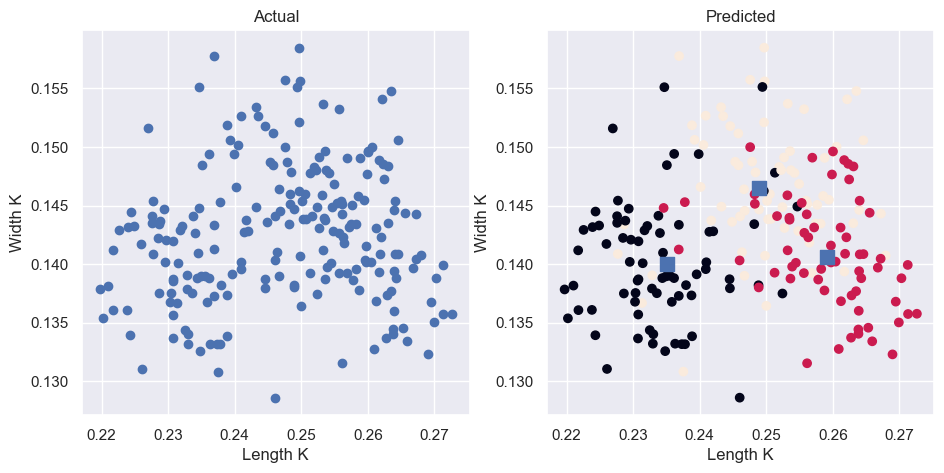

In [75]:
f, axes = plt.subplots(1, 2, figsize = (11, 5))

axes[0].scatter(df_scaled_array[:, 3], df_scaled_array[:, 4])
axes[1].scatter(df_scaled_array[:, 3], df_scaled_array[:, 4], c = fcm_labels)
axes[1].scatter(fcm_centers[:, 3], fcm_centers[:, 4], marker = "s", s = 100)
axes[0].set_xlabel('Length K')
axes[0].set_ylabel('Width K')
axes[1].set_xlabel('Length K')
axes[1].set_ylabel('Width K')
axes[0].set_title('Actual')
axes[1].set_title('Predicted')
plt.show()

# OPTICS Clustering

In [77]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from matplotlib import gridspec 
from sklearn.cluster import OPTICS, cluster_optics_dbscan 
from sklearn.preprocessing import normalize, StandardScaler 

In [78]:
df_op.head()

Area  Perimeter  Compacteness  Length K  Width K  Asymmetry  \
0  15.26      14.84        0.8710     5.763    3.312      2.221   
1  14.88      14.57        0.8811     5.554    3.333      1.018   
2  14.29      14.09        0.9050     5.291    3.337      2.699   
3  13.84      13.94        0.8955     5.324    3.379      2.259   
4  16.14      14.99        0.9034     5.658    3.562      1.355   

   Length Groove  Wheat Specie  
0          5.220             0  
1          4.956             0  
2          4.825             0  
3          4.805             0  
4          5.175             0

In [79]:
scaler = StandardScaler() 
df_scaled = scaler.fit_transform(df_op) 

In [80]:
df_normalized = normalize(df_scaled)

In [81]:
df_normalized = pd.DataFrame(df_normalized)

In [82]:
df_op.head()

Area  Perimeter  Compacteness  Length K  Width K  Asymmetry  \
0  15.26      14.84        0.8710     5.763    3.312      2.221   
1  14.88      14.57        0.8811     5.554    3.333      1.018   
2  14.29      14.09        0.9050     5.291    3.337      2.699   
3  13.84      13.94        0.8955     5.324    3.379      2.259   
4  16.14      14.99        0.9034     5.658    3.562      1.355   

   Length Groove  Wheat Specie  
0          5.220             0  
1          4.956             0  
2          4.825             0  
3          4.805             0  
4          5.175             0

In [83]:
df_normalized.head()

0         1         2         3         4         5         6  \
0  0.084937  0.128789  0.000036  0.181842  0.084700 -0.589457 -0.229278   
1  0.004646  0.003415  0.177948 -0.070024  0.081987 -0.742567 -0.382882   
2 -0.076930 -0.144274  0.577729 -0.305865  0.083331 -0.267351 -0.476316   
3 -0.142419 -0.195039  0.426480 -0.282702  0.131101 -0.394244 -0.504688   
4  0.168051  0.124775  0.518774  0.025161  0.303887 -0.590102 -0.179411   

          7  
0 -0.732073  
1 -0.508597  
2 -0.490556  
3 -0.502539  
4 -0.462249

In [84]:
 df_normalized.columns = df_op.columns 

In [85]:
df_normalized.head()

Area  Perimeter  Compacteness  Length K   Width K  Asymmetry  \
0  0.084937   0.128789      0.000036  0.181842  0.084700  -0.589457   
1  0.004646   0.003415      0.177948 -0.070024  0.081987  -0.742567   
2 -0.076930  -0.144274      0.577729 -0.305865  0.083331  -0.267351   
3 -0.142419  -0.195039      0.426480 -0.282702  0.131101  -0.394244   
4  0.168051   0.124775      0.518774  0.025161  0.303887  -0.590102   

   Length Groove  Wheat Specie  
0      -0.229278     -0.732073  
1      -0.382882     -0.508597  
2      -0.476316     -0.490556  
3      -0.504688     -0.502539  
4      -0.179411     -0.462249

In [86]:
optics_model = OPTICS(min_samples = 10, xi = 0.05, min_cluster_size = 0.05) 
  
optics_model.fit(df_normalized) 

OPTICS(min_cluster_size=0.05, min_samples=10)

In [87]:
labels1 = cluster_optics_dbscan(reachability = optics_model.reachability_, 
                                   core_distances = optics_model.core_distances_, 
                                   ordering = optics_model.ordering_, eps = 0.5) 
  
labels2 = cluster_optics_dbscan(reachability = optics_model.reachability_, 
                                   core_distances = optics_model.core_distances_, 
                                   ordering = optics_model.ordering_, eps = 2) 
  
space = np.arange(len(df_normalized)) 
  
reachability = optics_model.reachability_[optics_model.ordering_] 
  
labels = optics_model.labels_[optics_model.ordering_] 
  
print(labels) 

[-1 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1
  1  1  1  1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


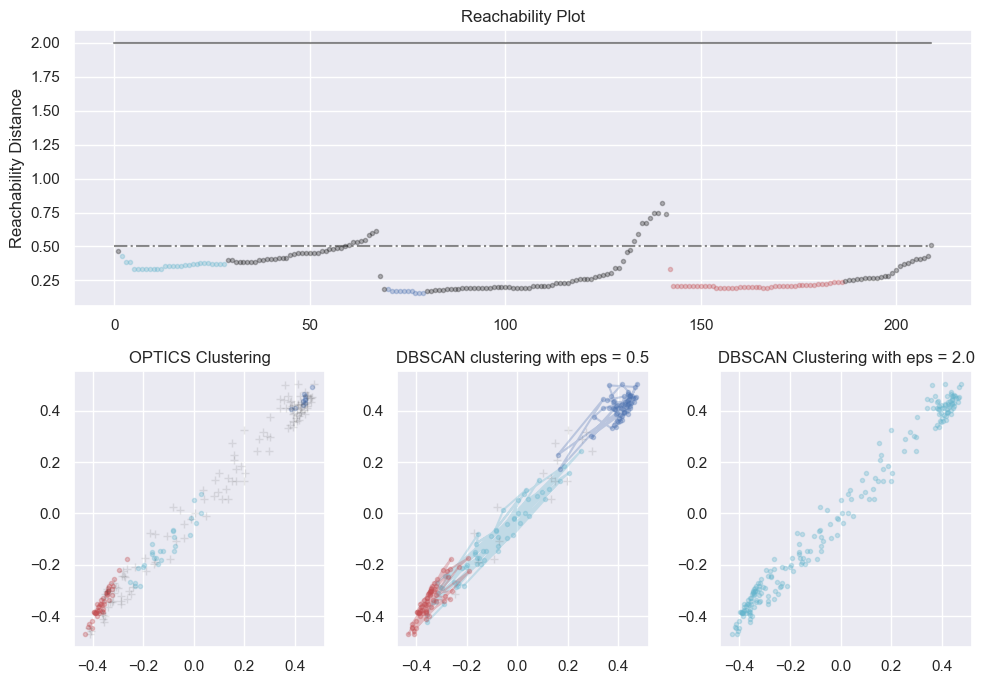

In [88]:
plt.figure(figsize =(10, 7)) 
G = gridspec.GridSpec(2, 3) 
ax1 = plt.subplot(G[0, :]) 
ax2 = plt.subplot(G[1, 0]) 
ax3 = plt.subplot(G[1, 1]) 
ax4 = plt.subplot(G[1, 2]) 
  
colors = ['c.', 'b.', 'r.', 'y.', 'g.'] 
for Class, colour in zip(range(0, 5), colors): 
    Xk = space[labels == Class] 
    Rk = reachability[labels == Class] 
    ax1.plot(Xk, Rk, colour, alpha = 0.3) 
ax1.plot(space[labels == -1], reachability[labels == -1], 'k.', alpha = 0.3) 
ax1.plot(space, np.full_like(space, 2., dtype = float), 'k-', alpha = 0.5) 
ax1.plot(space, np.full_like(space, 0.5, dtype = float), 'k-.', alpha = 0.5) 
ax1.set_ylabel('Reachability Distance') 
ax1.set_title('Reachability Plot') 
  
colors = ['c.', 'b.', 'r.', 'y.', 'g.'] 
for Class, colour in zip(range(0, 5), colors): 
    Xk = df_normalized[optics_model.labels_ == Class] 
    ax2.plot(Xk.iloc[:, 0], Xk.iloc[:, 1], colour, alpha = 0.3) 
      
ax2.plot(df_normalized.iloc[optics_model.labels_ == -1, 0], 
        df_normalized.iloc[optics_model.labels_ == -1, 1], 
       'k+', alpha = 0.1) 
ax2.set_title('OPTICS Clustering') 
  
colors = ['c', 'b', 'r', 'y', 'g', 'greenyellow'] 
for Class, colour in zip(range(0, 6), colors): 
    Xk = df_normalized[labels1 == Class] 
    ax3.plot(Xk.iloc[:, 0], Xk.iloc[:, 1], colour, alpha = 0.3, marker ='.') 
        
ax3.plot(df_normalized.iloc[labels1 == -1, 0], 
        df_normalized.iloc[labels1 == -1, 1], 
       'k+', alpha = 0.1) 
ax3.set_title('DBSCAN clustering with eps = 0.5') 
  
colors = ['c.', 'y.', 'm.', 'g.'] 
for Class, colour in zip(range(0, 4), colors): 
    Xk = df_normalized.iloc[labels2 == Class] 
    ax4.plot(Xk.iloc[:, 0], Xk.iloc[:, 1], colour, alpha = 0.3) 
          
ax4.plot(df_normalized.iloc[labels2 == -1, 0], 
        df_normalized.iloc[labels2 == -1, 1], 
       'k+', alpha = 0.1) 
ax4.set_title('DBSCAN Clustering with eps = 2.0') 

plt.tight_layout() 
plt.show() 

# Time Series Analysis

### Apple stock market dataset 

In [91]:
import yfinance as yf

ticker = 'AAPL'  
start_date = '1985-01-01'  
end_date = '2024-10-01'   

df_apple = yf.download(ticker, start=start_date, end=end_date, interval='1mo')

print(df.head())

df_apple.to_csv('apple_monthly.csv')

[*********************100%***********************]  1 of 1 completed

    Area  Perimeter  Compacteness  Length K  Width K  Asymmetry  \
0  15.26      14.84        0.8710     5.763    3.312      2.221   
1  14.88      14.57        0.8811     5.554    3.333      1.018   
2  14.29      14.09        0.9050     5.291    3.337      2.699   
3  13.84      13.94        0.8955     5.324    3.379      2.259   
4  16.14      14.99        0.9034     5.658    3.562      1.355   

   Length Groove Wheat Specie  DBSCAN_labels  
0          5.220         Kama              0  
1          4.956         Kama              0  
2          4.825         Kama              0  
3          4.805         Kama              0  
4          5.175         Kama              0  


In [92]:
import yfinance as yf

ticker = 'AAPL'  
start_date = '2005-01-01' 
end_date = '2024-10-01'   

df_apple2005 = yf.download(ticker, start=start_date, end=end_date, interval='1mo')

print(df_apple2005.head())

df_apple.to_csv('apple_monthly_2005.csv')

[*********************100%***********************]  1 of 1 completed

                Open      High       Low     Close  Adj Close       Volume
Date                                                                      
2005-01-01  1.156786  1.390893  1.117857  1.373214   1.159645  25708244800
2005-02-01  1.375893  1.622857  1.367500  1.602143   1.352970  21448946400
2005-03-01  1.606786  1.611071  1.386786  1.488214   1.256760  14675920000
2005-04-01  1.503214  1.587500  1.214286  1.287857   1.087564  19375518400
2005-05-01  1.293214  1.462143  1.182500  1.420000   1.199154  12858294400


In [93]:
df_apnew = pd.read_csv("apple_monthly.csv")

In [94]:
df_apnew.head()

Date      Open      High       Low     Close  Adj Close      Volume
0  1985-01-01  0.130022  0.138951  0.124442  0.129464   0.099804  6366416000
1  1985-02-01  0.129464  0.137277  0.110491  0.110491   0.085177  4733388800
2  1985-03-01  0.110491  0.116071  0.092634  0.098772   0.076143  4615587200
3  1985-04-01  0.098772  0.102679  0.087612  0.094866   0.073132  2868028800
4  1985-05-01  0.094866  0.099330  0.075335  0.077567   0.059796  4639129600

In [95]:
df_apnew.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [96]:
df_apnew = df_apnew.drop(columns=['Open', 'High', 'Low', 'Adj Close', 'Volume'])

In [97]:
df_apnew.head()

Date     Close
0  1985-01-01  0.129464
1  1985-02-01  0.110491
2  1985-03-01  0.098772
3  1985-04-01  0.094866
4  1985-05-01  0.077567

In [98]:
df_apnew.tail()

Date       Close
472  2024-05-01  192.250000
473  2024-06-01  210.619995
474  2024-07-01  222.080002
475  2024-08-01  229.000000
476  2024-09-01  233.000000

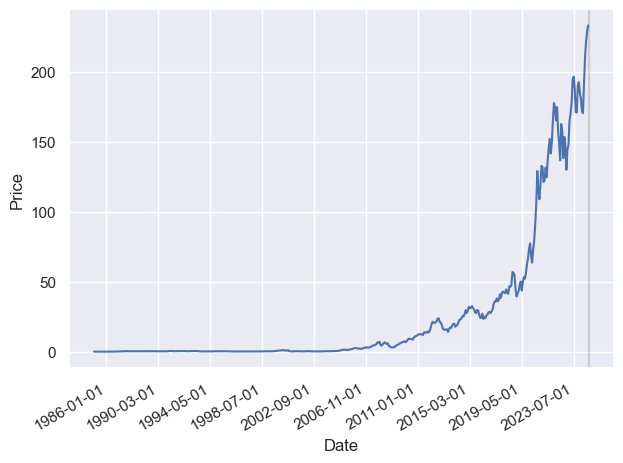

In [99]:
fig, ax = plt.subplots()

ax.plot(df_apnew['Date'], df_apnew['Close'])
ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.axvspan(476, 477, color='#808080', alpha=0.2)

plt.xticks(np.arange(12, 476, 50))

fig.autofmt_xdate()
plt.tight_layout()

In [100]:
df_apnew1 = pd.read_csv("apple_monthly_05.csv")

In [101]:
df_apnew1.head()

Date      Open      High       Low     Close  Adj Close       Volume
0  01/01/2005  1.156786  1.390893  1.117857  1.373214   1.159645  25708244800
1  01/02/2005  1.375893  1.622857  1.367500  1.602143   1.352970  21448946400
2  01/03/2005  1.606786  1.611071  1.386786  1.488214   1.256760  14675920000
3  01/04/2005  1.503214  1.587500  1.214286  1.287857   1.087564  19375518400
4  01/05/2005  1.293214  1.462143  1.182500  1.420000   1.199155  12858294400

In [102]:
df_apnew1.tail()

Date        Open        High         Low       Close   Adj Close  \
232  01/05/2024  169.580002  193.000000  169.110001  192.250000  191.767624   
233  01/06/2024  192.899994  220.199997  192.149994  210.619995  210.376480   
234  01/07/2024  212.089996  237.229996  211.919998  222.080002  221.823242   
235  01/08/2024  224.369995  232.919998  196.000000  229.000000  228.735245   
236  01/09/2024  228.550003  233.089996  213.919998  233.000000  233.000000   

         Volume  
232  1336537700  
233  1723984500  
234  1153099800  
235  1122667000  
236  1232140300

In [103]:
df_aparima = df_apnew1.copy()

In [104]:
df_apnew1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       237 non-null    object 
 1   Open       237 non-null    float64
 2   High       237 non-null    float64
 3   Low        237 non-null    float64
 4   Close      237 non-null    float64
 5   Adj Close  237 non-null    float64
 6   Volume     237 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.1+ KB


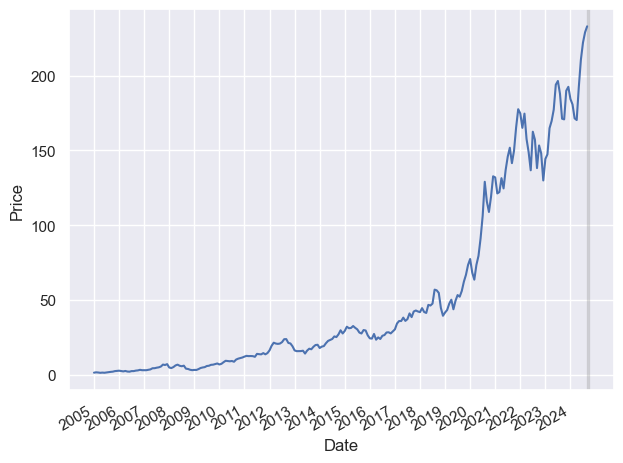

In [105]:
fig, ax = plt.subplots()

ax.plot(df_apnew1['Date'], df_apnew1['Close'])
ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.axvspan(236, 237, color='#808080', alpha=0.2)

plt.xticks(np.arange(0, 236, 12), [2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024])

fig.autofmt_xdate()
plt.tight_layout()

In [106]:
train = df_apnew1[: -4]
test = df_apnew1[-4: ]

train.shape, test.shape

((233, 7), (4, 7))

In [107]:
historical_mean = np.mean(train['Close'])

historical_mean

48.43280797282404

In [108]:
test.loc[:, 'Pred. Mean'] = historical_mean

test

Date        Open        High         Low       Close   Adj Close  \
233  01/06/2024  192.899994  220.199997  192.149994  210.619995  210.376480   
234  01/07/2024  212.089996  237.229996  211.919998  222.080002  221.823242   
235  01/08/2024  224.369995  232.919998  196.000000  229.000000  228.735245   
236  01/09/2024  228.550003  233.089996  213.919998  233.000000  233.000000   

         Volume  Pred. Mean  
233  1723984500   48.432808  
234  1153099800   48.432808  
235  1122667000   48.432808  
236  1232140300   48.432808

In [109]:
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [110]:
mape_hist_mean = mape(test['Close'], test['Pred. Mean'])

mape_hist_mean

78.31490423697642

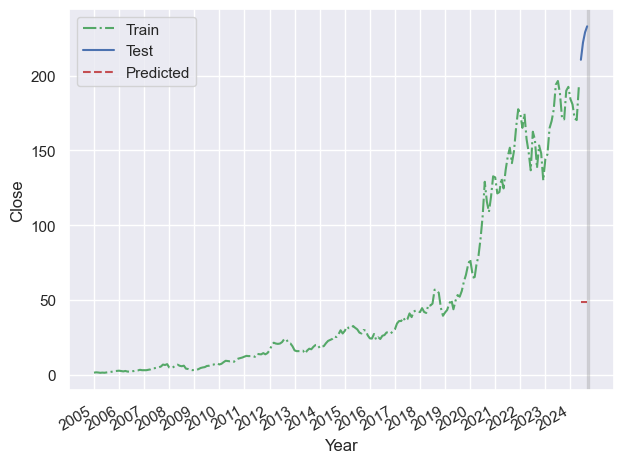

In [111]:
fig, ax = plt.subplots()

ax.plot(train['Date'], train['Close'], 'g-.', label = 'Train')
ax.plot(test['Date'], test['Close'], 'b-', label = 'Test')
ax.plot(test['Date'], test['Pred. Mean'], 'r--', label = 'Predicted')
ax.set_xlabel('Year')
ax.set_ylabel('Close')
ax.axvspan(236, 237, color='#808080', alpha = 0.2)
ax.legend(loc = 2)
plt.xticks(np.arange(0, 236, 12), [2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024])

fig.autofmt_xdate()
plt.tight_layout()

In [112]:
last_year_mean = np.mean(train['Close'][-4:])

last_year_mean

178.702499375

In [113]:
test.loc[:, 'Pred. LY Mean'] = last_year_mean

test

Date        Open        High         Low       Close   Adj Close  \
233  01/06/2024  192.899994  220.199997  192.149994  210.619995  210.376480   
234  01/07/2024  212.089996  237.229996  211.919998  222.080002  221.823242   
235  01/08/2024  224.369995  232.919998  196.000000  229.000000  228.735245   
236  01/09/2024  228.550003  233.089996  213.919998  233.000000  233.000000   

         Volume  Pred. Mean  Pred. LY Mean  
233  1723984500   48.432808     178.702499  
234  1153099800   48.432808     178.702499  
235  1122667000   48.432808     178.702499  
236  1232140300   48.432808     178.702499

In [114]:
mape_last_year_mean = mape(test['Close'], test['Pred. LY Mean'])
mape_last_year_mean

19.98851658130323

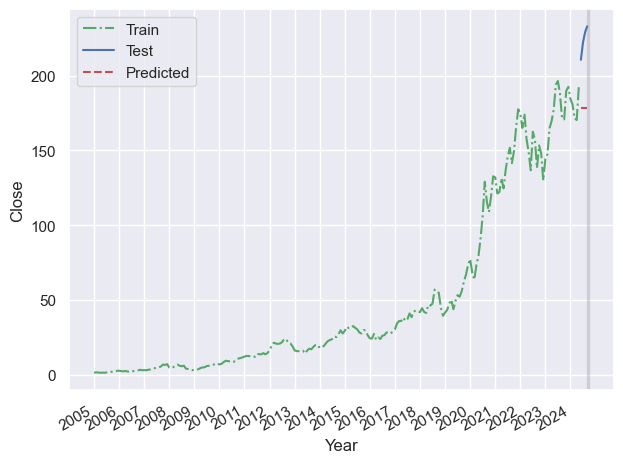

In [115]:
fig, ax = plt.subplots()

ax.plot(train['Date'], train['Close'], 'g-.', label = 'Train')
ax.plot(test['Date'], test['Close'], 'b-', label = 'Test')
ax.plot(test['Date'], test['Pred. LY Mean'], 'r--', label = 'Predicted')
ax.set_xlabel('Year')
ax.set_ylabel('Close')
ax.axvspan(236, 237, color='#808080', alpha = 0.2)
ax.legend(loc = 2)
plt.xticks(np.arange(0, 236, 12), [2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024])

fig.autofmt_xdate()
plt.tight_layout()

In [116]:
last = train['Close'].iloc[-1]
last

192.25

In [117]:
test.loc[:, 'Pred. Last'] = last

test

Date        Open        High         Low       Close   Adj Close  \
233  01/06/2024  192.899994  220.199997  192.149994  210.619995  210.376480   
234  01/07/2024  212.089996  237.229996  211.919998  222.080002  221.823242   
235  01/08/2024  224.369995  232.919998  196.000000  229.000000  228.735245   
236  01/09/2024  228.550003  233.089996  213.919998  233.000000  233.000000   

         Volume  Pred. Mean  Pred. LY Mean  Pred. Last  
233  1723984500   48.432808     178.702499      192.25  
234  1153099800   48.432808     178.702499      192.25  
235  1122667000   48.432808     178.702499      192.25  
236  1232140300   48.432808     178.702499      192.25

In [118]:
mape_last = mape(test['Close'], test['Pred. Last'])
mape_last

13.922817302261054

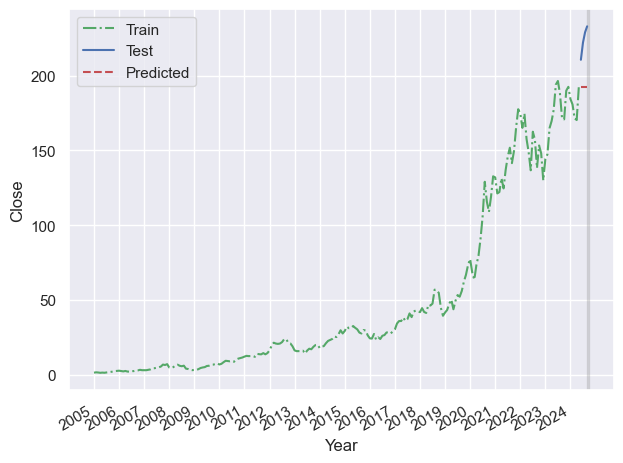

In [119]:
fig, ax = plt.subplots()

ax.plot(train['Date'], train['Close'], 'g-.', label = 'Train')
ax.plot(test['Date'], test['Close'], 'b-', label = 'Test')
ax.plot(test['Date'], test['Pred. Last'], 'r--', label = 'Predicted')
ax.set_xlabel('Year')
ax.set_ylabel('Close')
ax.axvspan(236, 237, color='#808080', alpha = 0.2)
ax.legend(loc = 2)
plt.xticks(np.arange(0, 236, 12), [2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024])

fig.autofmt_xdate()
plt.tight_layout()

In [120]:
test.loc[:, 'Pred. LS'] = train['Close'][-4:].values

test

Date        Open        High         Low       Close   Adj Close  \
233  01/06/2024  192.899994  220.199997  192.149994  210.619995  210.376480   
234  01/07/2024  212.089996  237.229996  211.919998  222.080002  221.823242   
235  01/08/2024  224.369995  232.919998  196.000000  229.000000  228.735245   
236  01/09/2024  228.550003  233.089996  213.919998  233.000000  233.000000   

         Volume  Pred. Mean  Pred. LY Mean  Pred. Last    Pred. LS  
233  1723984500   48.432808     178.702499      192.25  180.750000  
234  1153099800   48.432808     178.702499      192.25  171.479996  
235  1122667000   48.432808     178.702499      192.25  170.330002  
236  1232140300   48.432808     178.702499      192.25  192.250000

In [121]:
mape_naive_seasonal = mape(test['Close'], test['Pred. LS'])
mape_naive_seasonal

20.018969667933852

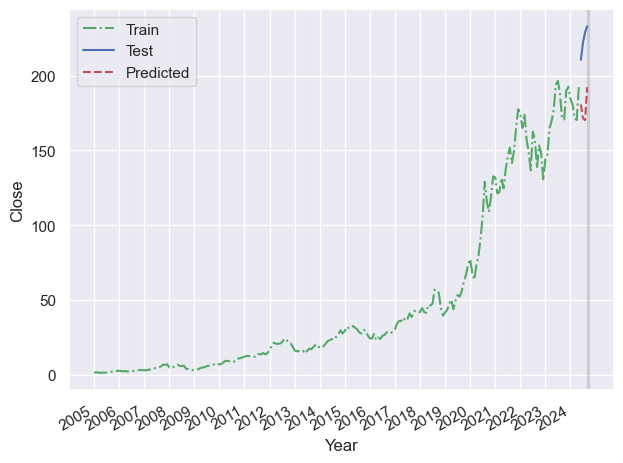

In [122]:
fig, ax = plt.subplots()

ax.plot(train['Date'], train['Close'], 'g-.', label = 'Train')
ax.plot(test['Date'], test['Close'], 'b-', label = 'Test')
ax.plot(test['Date'], test['Pred. LS'], 'r--', label = 'Predicted')
ax.set_xlabel('Year')
ax.set_ylabel('Close')
ax.axvspan(236, 237, color='#808080', alpha = 0.2)
ax.legend(loc = 2)
plt.xticks(np.arange(0, 236, 12), [2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024])

fig.autofmt_xdate()
plt.tight_layout()

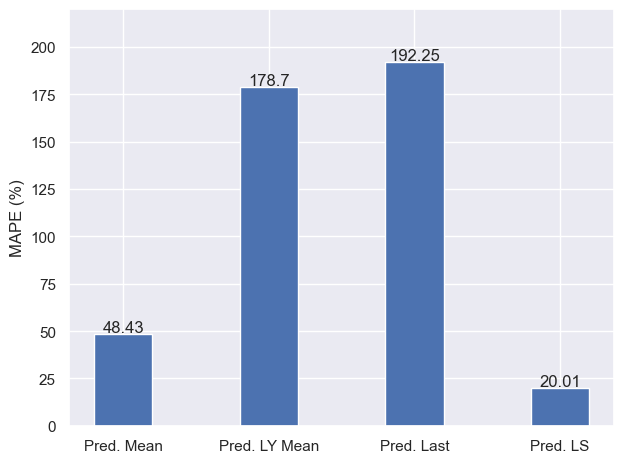

In [123]:
fig, ax = plt.subplots()

x = ['Pred. Mean', 'Pred. LY Mean', 'Pred. Last', 'Pred. LS']
y = [48.43, 178.70, 192.25, 20.01]

ax.bar(x, y, width = 0.4)
ax.set_ylabel('MAPE (%)')
ax.set_ylim(0, 220)

for index, value in enumerate(y):
    plt.text(x=index, y=value + 1, s=str(value), ha='center')

plt.tight_layout()

# ARIMA Model

In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
import statsmodels.tsa.api as smtsa

In [126]:
def plotds(xt, nlag = 27, fig_size = (12, 10)):
    if not isinstance(xt, pd.Series):
         xt = pd.Series(xt)
    plt.figure(figsize=fig_size)
    layout = (2, 2)
    
    ax_xt = plt.subplot2grid(layout, (0, 0), colspan = 2)
    ax_acf= plt.subplot2grid(layout, (1, 0))
    ax_pacf = plt.subplot2grid(layout, (1, 1))
    
    xt.plot(ax = ax_xt)
    ax_xt.set_title('Time Series')
    plot_acf(xt, lags = 50, ax = ax_acf)
    plot_pacf(xt, lags = 27, ax = ax_pacf)
    plt.tight_layout()
    return None

In [127]:
df_aparima = pd.read_csv("apple_monthly_2020.csv")

In [128]:
df_aparima.head()

Date       Open       High        Low      Close  Adj Close  \
0  01/01/2020  74.059998  81.962502  73.187500  77.377502  75.098686   
1  01/02/2020  76.074997  81.805000  64.092499  68.339996  66.327324   
2  01/03/2020  70.570000  76.000000  53.152500  63.572498  61.846657   
3  01/04/2020  61.625000  73.632500  59.224998  73.449997  71.456001   
4  01/05/2020  71.562500  81.059998  71.462502  79.485001  77.327187   

       Volume  
0  2934370400  
1  3019279200  
2  6280072400  
3  3265299200  
4  2805936000

In [129]:
df_aparima.index = df_aparima['Date']

df_aparima.drop('Date', axis = 1, inplace = True)

In [130]:
df_aparima.head(5)

Open       High        Low      Close  Adj Close      Volume
Date                                                                         
01/01/2020  74.059998  81.962502  73.187500  77.377502  75.098686  2934370400
01/02/2020  76.074997  81.805000  64.092499  68.339996  66.327324  3019279200
01/03/2020  70.570000  76.000000  53.152500  63.572498  61.846657  6280072400
01/04/2020  61.625000  73.632500  59.224998  73.449997  71.456001  3265299200
01/05/2020  71.562500  81.059998  71.462502  79.485001  77.327187  2805936000

In [131]:
df_aparima.info()

<class 'pandas.core.frame.DataFrame'>
Index: 57 entries, 01/01/2020 to 01/09/2024
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       57 non-null     float64
 1   High       57 non-null     float64
 2   Low        57 non-null     float64
 3   Close      57 non-null     float64
 4   Adj Close  57 non-null     float64
 5   Volume     57 non-null     int64  
dtypes: float64(5), int64(1)
memory usage: 3.1+ KB


In [132]:
df_aparima.describe()

Open        High         Low       Close   Adj Close  \
count   57.000000   57.000000   57.000000   57.000000   57.000000   
mean   148.516140  159.137017  139.714210  151.097105  149.337843   
std     38.524019   38.714773   36.942031   38.895176   39.426330   
min     61.625000   73.632500   53.152500   63.572498   61.846657   
25%    130.279999  137.880005  122.250000  129.929993  128.719360   
50%    149.899994  163.630005  141.270004  151.830002  149.106003   
75%    174.009995  182.339996  165.669998  174.779999  172.203995   
max    228.550003  237.229996  213.919998  233.000000  233.000000   

             Volume  
count  5.700000e+01  
mean   1.949853e+09  
std    9.329702e+08  
min    9.697097e+08  
25%    1.322439e+09  
50%    1.691029e+09  
75%    2.240262e+09  
max    6.280072e+09

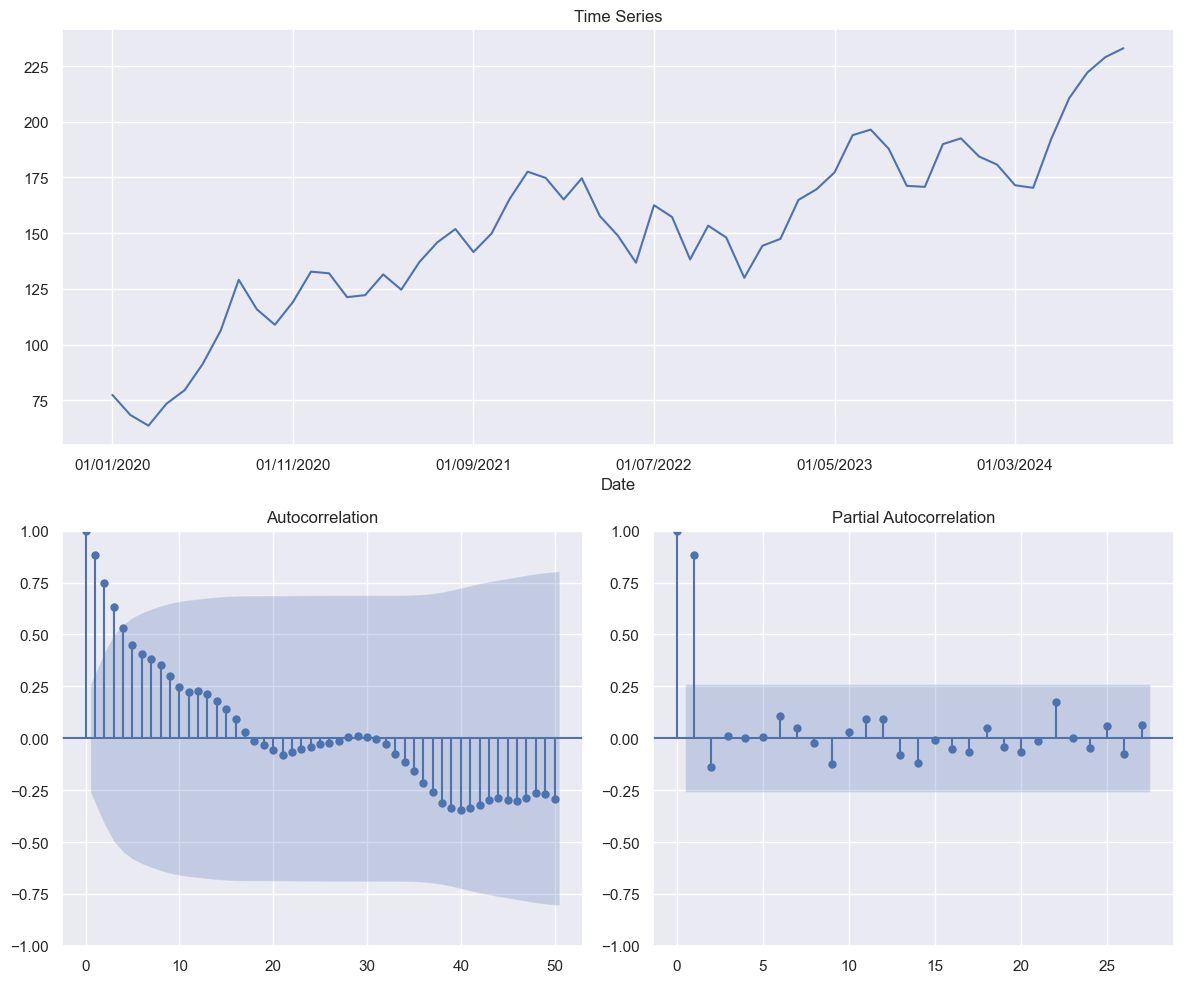

In [133]:
plotds(df_aparima['Close'], nlag = 30)

In [134]:
mean1, mean2 = df_aparima.iloc[:125].Close.mean(), df_aparima.iloc[125:].Close.mean()

var1, var2 = df_aparima.iloc[:125].Close.var(), df_aparima.iloc[125:].Close.var()

print('mean1 = %f, mean2 = %f' % (mean1, mean2))
print('variance1 = %f, variance2 = %f' % (var1, var2))

mean1 = 151.097105, mean2 = nan
variance1 = 1512.834702, variance2 = nan


In [135]:
from statsmodels.tsa.stattools import adfuller

adf_result = adfuller(df_aparima.Close.tolist())
print('ADF Statistic: %f' % adf_result[0])
print('p-value: %f' % adf_result[1])

ADF Statistic: -0.943785
p-value: 0.773212


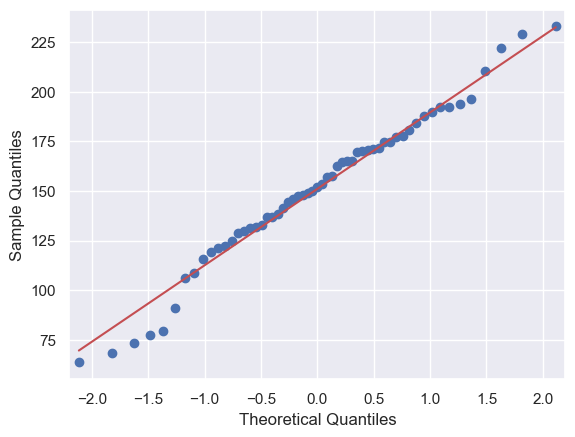

In [136]:
x = sm.qqplot(df_aparima['Close'], line = 's')

In [137]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(df_aparima['Close'], order = (1, 1, 0))

results_AR = model.fit()

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



In [138]:
first_order_diff = df_aparima['Close'].diff(1)

first_order_diff.head()

Date
01/01/2020         NaN
01/02/2020   -9.037506
01/03/2020   -4.767498
01/04/2020    9.877499
01/05/2020    6.035004
Name: Close, dtype: float64

In [139]:
first_order_diff = df_aparima['Close'].diff(1).dropna()

first_order_diff.head()

Date
01/02/2020    -9.037506
01/03/2020    -4.767498
01/04/2020     9.877499
01/05/2020     6.035004
01/06/2020    11.714996
Name: Close, dtype: float64

Text(0.5, 1.0, 'First-order differences of DJIA during Jan 2020 - Oct 2024')

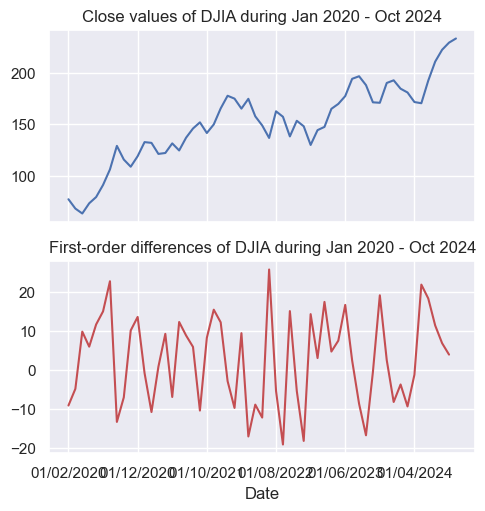

In [140]:
fig, ax = plt.subplots(2, sharex = True)
fig.set_size_inches(5.5, 5.5)
df_aparima['Close'].plot(ax = ax[0], color = 'b')
ax[0].set_title('Close values of DJIA during Jan 2020 - Oct 2024')
first_order_diff.plot(ax = ax[1], color = 'r')
ax[1].set_title('First-order differences of DJIA during Jan 2020 - Oct 2024')

ADF Statistic: -6.305083
p-value: 0.000000


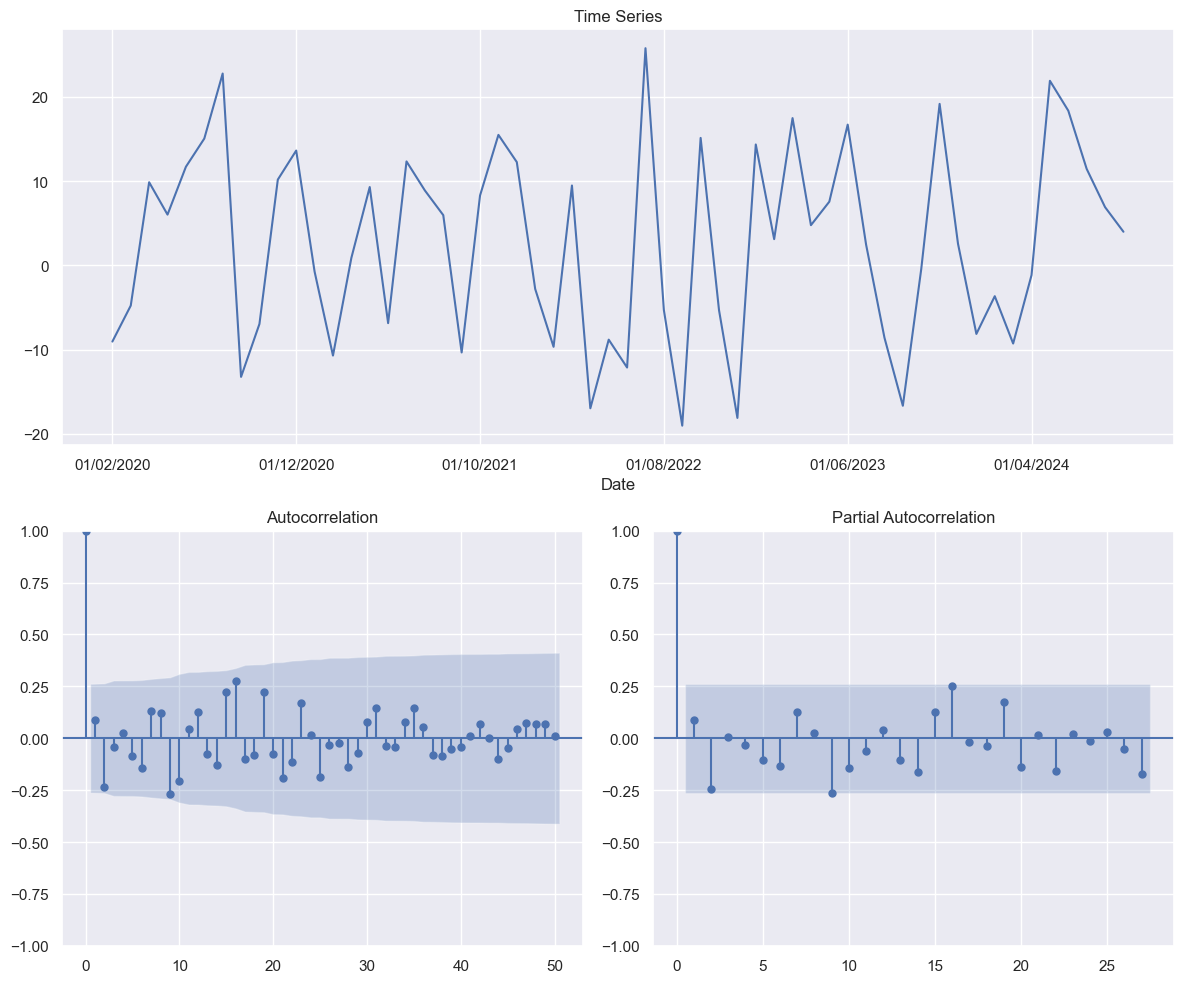

In [141]:
plotds(first_order_diff, nlag = 30)

adf_result = adfuller(first_order_diff)

print('ADF Statistic: %f' % adf_result[0])
print('p-value: %f' % adf_result[1])

In [142]:
aicVal=[]
for d in range(1,3):
    for ari in range(0, 3):
        for maj in range(0,3):
            try:
                arima_obj = ARIMA(df_aparima['Close'].tolist(), order=(ari,d,maj))
                arima_obj_fit=arima_obj.fit()
                aicVal.append([ari, d, maj, arima_obj_fit.aic])
            except ValueError:
                pass
print(aicVal)

[[0, 1, 0, 437.7559775600694], [0, 1, 1, 438.0136708250846], [0, 1, 2, 438.61915066876486], [1, 1, 0, 438.6356556727127], [1, 1, 1, 439.0867636253966], [1, 1, 2, 440.6133787301517], [2, 1, 0, 438.6568769284596], [2, 1, 1, 440.4892517414655], [2, 1, 2, 436.7494040697764], [0, 2, 0, 460.32233227164113], [0, 2, 1, 433.8739765039532], [0, 2, 2, 434.74858475677087], [1, 2, 0, 456.3940769081068], [1, 2, 1, 435.24203067088143], [1, 2, 2, 435.5940142469128], [2, 2, 0, 447.5962491235567], [2, 2, 1, 434.28869152836194], [2, 2, 2, 436.2682873447518]]


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



In [143]:
arima_obj = ARIMA(df_aparima['Close'].tolist(), order = (0, 2, 1))

arima_obj_fit = arima_obj.fit()

arima_obj_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   57
Model:                 ARIMA(0, 2, 1)   Log Likelihood                -214.937
Date:                Fri, 01 Nov 2024   AIC                            433.874
Time:                        21:26:54   BIC                            437.889
Sample:                             0   HQIC                           435.426
                                 - 57                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9994      4.871     -0.205      0.837     -10.546       8.548
sigma2       135.0155    660.222      0.205      0.838   -1158.995    1429.026
===================================================================================
Ljung-Box (L1) (Q):                   0.63   Jarque-Bera (JB):                 2.45
Prob(Q):                              0.43   Prob(JB):                         0.29
Heteroskedasticity (H):               1.10   Skew:                            -0.15
Prob(H) (two-sided):                  0.85   Kurtosis:                         2.01
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [144]:
df_aparima.head()

Open       High        Low      Close  Adj Close      Volume
Date                                                                         
01/01/2020  74.059998  81.962502  73.187500  77.377502  75.098686  2934370400
01/02/2020  76.074997  81.805000  64.092499  68.339996  66.327324  3019279200
01/03/2020  70.570000  76.000000  53.152500  63.572498  61.846657  6280072400
01/04/2020  61.625000  73.632500  59.224998  73.449997  71.456001  3265299200
01/05/2020  71.562500  81.059998  71.462502  79.485001  77.327187  2805936000

In [145]:
pred = arima_obj_fit.fittedvalues

df_aparima['ARIMA'] = pred

diffval = arima_obj_fit.resid + arima_obj_fit.fittedvalues

df_aparima['diffval'] = diffval

df_aparima.head()

Open       High        Low      Close  Adj Close      Volume  \
Date                                                                            
01/01/2020  74.059998  81.962502  73.187500  77.377502  75.098686  2934370400   
01/02/2020  76.074997  81.805000  64.092499  68.339996  66.327324  3019279200   
01/03/2020  70.570000  76.000000  53.152500  63.572498  61.846657  6280072400   
01/04/2020  61.625000  73.632500  59.224998  73.449997  71.456001  3265299200   
01/05/2020  71.562500  81.059998  71.462502  79.485001  77.327187  2805936000   

                 ARIMA    diffval  
Date                               
01/01/2020    0.000000  77.377502  
01/02/2020  116.066254  68.339996  
01/03/2020   59.315364  63.572498  
01/04/2020   56.676147  73.449997  
01/05/2020   72.144430  79.485001

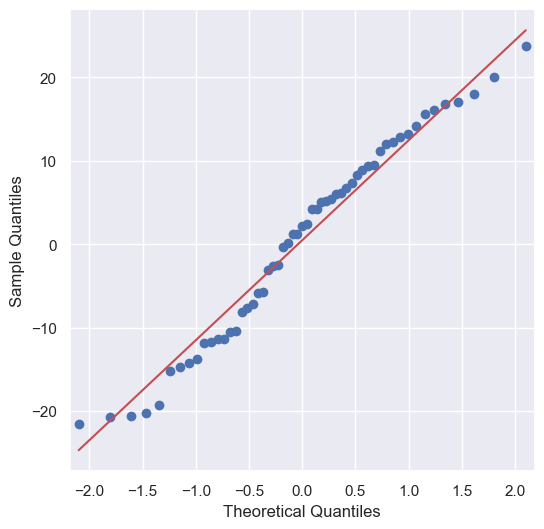

In [146]:
fig, ax = plt.subplots(figsize=(6, 6))

residuals = arima_obj_fit.resid[2:]

sm.qqplot(residuals, line='s', ax=ax)
plt.show()

In [147]:
print(df_aparima['diffval'], df_aparima['ARIMA'])

Date
01/01/2020     77.377502
01/02/2020     68.339996
01/03/2020     63.572498
01/04/2020     73.449997
01/05/2020     79.485001
01/06/2020     91.199997
01/07/2020    106.260002
01/08/2020    129.039993
01/09/2020    115.809998
01/10/2020    108.860001
01/11/2020    119.050003
01/12/2020    132.690002
01/01/2021    131.960007
01/02/2021    121.260002
01/03/2021    122.150002
01/04/2021    131.460007
01/05/2021    124.610001
01/06/2021    136.960007
01/07/2021    145.860001
01/08/2021    151.830002
01/09/2021    141.500000
01/10/2021    149.800003
01/11/2021    165.300003
01/12/2021    177.570007
01/01/2022    174.779999
01/02/2022    165.119995
01/03/2022    174.610001
01/04/2022    157.649994
01/05/2022    148.839996
01/06/2022    136.720001
01/07/2022    162.509995
01/08/2022    157.220001
01/09/2022    138.199997
01/10/2022    153.339996
01/11/2022    148.029999
01/12/2022    129.929993
01/01/2023    144.289993
01/02/2023    147.410004
01/03/2023    164.899994
01/04/2023    169.67

In [148]:
df_aparima.head()

Open       High        Low      Close  Adj Close      Volume  \
Date                                                                            
01/01/2020  74.059998  81.962502  73.187500  77.377502  75.098686  2934370400   
01/02/2020  76.074997  81.805000  64.092499  68.339996  66.327324  3019279200   
01/03/2020  70.570000  76.000000  53.152500  63.572498  61.846657  6280072400   
01/04/2020  61.625000  73.632500  59.224998  73.449997  71.456001  3265299200   
01/05/2020  71.562500  81.059998  71.462502  79.485001  77.327187  2805936000   

                 ARIMA    diffval  
Date                               
01/01/2020    0.000000  77.377502  
01/02/2020  116.066254  68.339996  
01/03/2020   59.315364  63.572498  
01/04/2020   56.676147  73.449997  
01/05/2020   72.144430  79.485001

In [149]:
df_aparima['diffval'].iloc[2:]

Date
01/03/2020     63.572498
01/04/2020     73.449997
01/05/2020     79.485001
01/06/2020     91.199997
01/07/2020    106.260002
01/08/2020    129.039993
01/09/2020    115.809998
01/10/2020    108.860001
01/11/2020    119.050003
01/12/2020    132.690002
01/01/2021    131.960007
01/02/2021    121.260002
01/03/2021    122.150002
01/04/2021    131.460007
01/05/2021    124.610001
01/06/2021    136.960007
01/07/2021    145.860001
01/08/2021    151.830002
01/09/2021    141.500000
01/10/2021    149.800003
01/11/2021    165.300003
01/12/2021    177.570007
01/01/2022    174.779999
01/02/2022    165.119995
01/03/2022    174.610001
01/04/2022    157.649994
01/05/2022    148.839996
01/06/2022    136.720001
01/07/2022    162.509995
01/08/2022    157.220001
01/09/2022    138.199997
01/10/2022    153.339996
01/11/2022    148.029999
01/12/2022    129.929993
01/01/2023    144.289993
01/02/2023    147.410004
01/03/2023    164.899994
01/04/2023    169.679993
01/05/2023    177.250000
01/06/2023    193.97

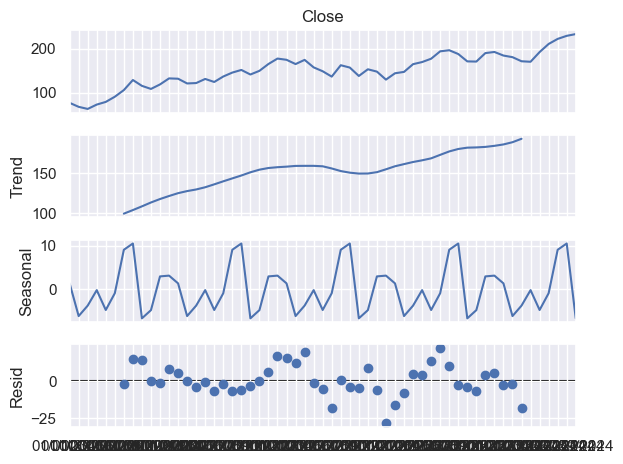

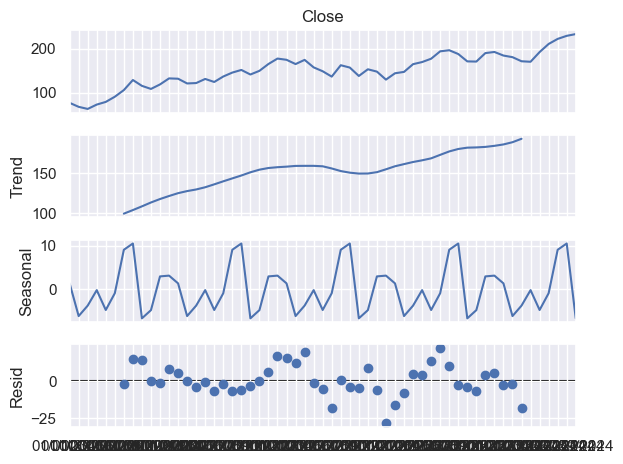

In [150]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(df_aparima['Close'], model='additive', period=12) 
decomposition.plot()

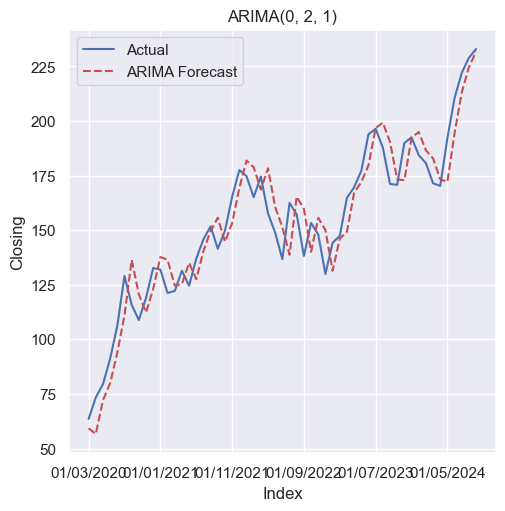

In [151]:
f, axarr = plt.subplots(1, sharex=True)
f.set_size_inches(5.5, 5.5)

df_aparima['diffval'].iloc[2:].plot(color='b', linestyle='-', ax=axarr, label='Actual')
df_aparima['ARIMA'].iloc[2:].plot(color='r', linestyle='--', ax=axarr, label='ARIMA Forecast')
axarr.set_title('ARIMA(0, 2, 1)')
axarr.set_xlabel('Index')
axarr.set_ylabel('Closing')
axarr.legend()  

plt.show()

In [152]:
result = arima_obj_fit.get_forecast()
forecast = result.predicted_mean

# summarize confidence intervals
intervals = [0.2, 0.1, 0.05, 0.01]

for a in intervals:
    ci = result.conf_int(alpha=a)
    print('%.1f%% Confidence Interval: %.3f between %.3f and %.3f' % ((1-a)*100, forecast, ci[0,0], ci[0,1]))

80.0% Confidence Interval: 235.779 between 220.761 and 250.798
90.0% Confidence Interval: 235.779 between 216.503 and 255.056
95.0% Confidence Interval: 235.779 between 212.810 and 258.748
99.0% Confidence Interval: 235.779 between 205.593 and 265.966


/var/folders/58/hjv5r5717qggdykqpbz07wbw0000gn/T/ipykernel_22820/3337534286.py:9: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index i

ADF Statistic: -0.9437850709518246
p-value: 0.7732117501487343
                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                   57
Model:                 ARIMA(2, 2, 1)   Log Likelihood                -213.144
Date:                Fri, 01 Nov 2024   AIC                            434.289
Time:                        21:26:55   BIC                            442.318
Sample:                             0   HQIC                           437.394
                                 - 57                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1214      0.148      0.821      0.411      -0.168       0.411
ar.L2         -0.2291      0.131     -1.755      0.079      -0.485  

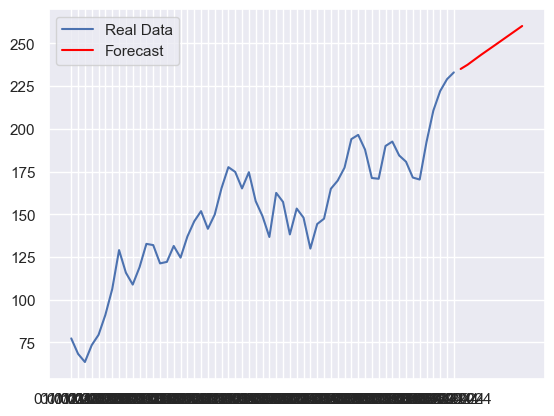

In [153]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller

series = df_aparima['Close']  


result = adfuller(series)
print('ADF Statistic:', result[0])
print('p-value:', result[1])

differenced = series.diff().dropna()

model = ARIMA(series, order=(2, 2, 1)) 
model_fit = model.fit()

print(model_fit.summary())

forecast = model_fit.forecast(steps=10)
print(forecast)


plt.plot(series, label='Real Data')
plt.plot(range(len(series), len(series) + 10), forecast, label='Forecast', color='red')
plt.legend()
plt.show()

# Seasonal ARIMA

In [155]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
import numpy as np
import pandas as pd

from itertools import product
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_log_error

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [156]:
df_apnew1.head()

Date      Open      High       Low     Close  Adj Close       Volume
0  01/01/2005  1.156786  1.390893  1.117857  1.373214   1.159645  25708244800
1  01/02/2005  1.375893  1.622857  1.367500  1.602143   1.352970  21448946400
2  01/03/2005  1.606786  1.611071  1.386786  1.488214   1.256760  14675920000
3  01/04/2005  1.503214  1.587500  1.214286  1.287857   1.087564  19375518400
4  01/05/2005  1.293214  1.462143  1.182500  1.420000   1.199155  12858294400

<Figure size 12000x1200 with 0 Axes>

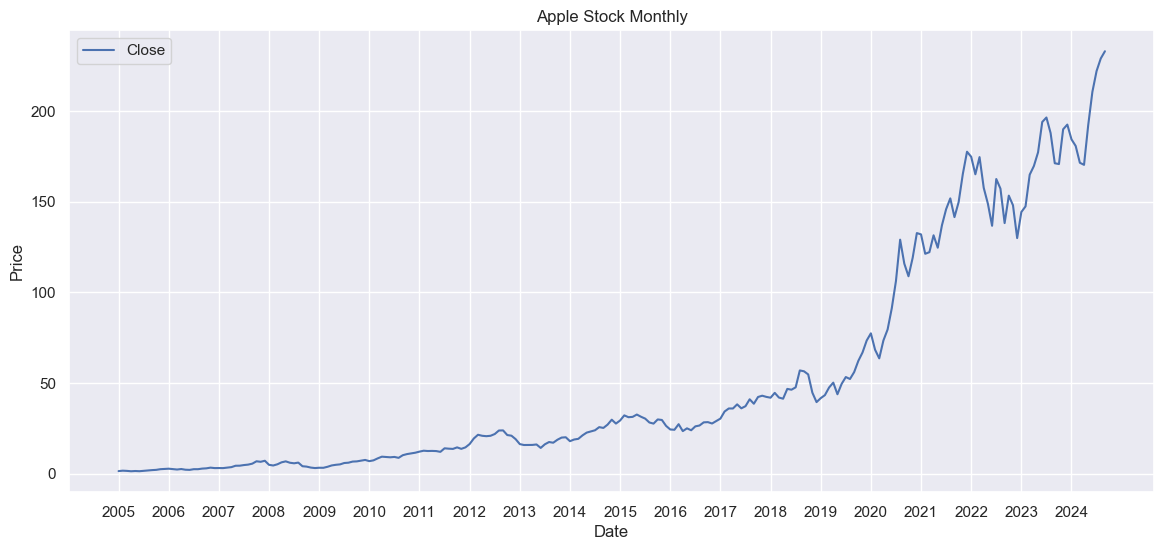

In [157]:
plt.figure(figsize=[120, 12]); 
df_apnew1.plot(x = 'Date', y = 'Close', figsize = (14, 6), color = 'b')
plt.title('Apple Stock Monthly')
plt.ylabel('Price')
plt.xlabel('Date')
plt.xticks(np.arange(0, 236, 12), [2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024])
plt.grid(True)
plt.show()

In [158]:
from statsmodels.tsa.stattools import adfuller
ad_fuller_result = adfuller(df_apnew1['Close'])

print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: 3.016560397047227
p-value: 1.0


In [159]:
df_apnew1['Price First Difference'] = df_apnew1['Close'] - df_apnew1['Close'].shift(1)

df_apnew1.head()

Date      Open      High       Low     Close  Adj Close       Volume  \
0  01/01/2005  1.156786  1.390893  1.117857  1.373214   1.159645  25708244800   
1  01/02/2005  1.375893  1.622857  1.367500  1.602143   1.352970  21448946400   
2  01/03/2005  1.606786  1.611071  1.386786  1.488214   1.256760  14675920000   
3  01/04/2005  1.503214  1.587500  1.214286  1.287857   1.087564  19375518400   
4  01/05/2005  1.293214  1.462143  1.182500  1.420000   1.199155  12858294400   

   Price First Difference  
0                     NaN  
1                0.228929  
2               -0.113929  
3               -0.200357  
4                0.132143

In [160]:
df_apnew1.dropna(subset = ["Price First Difference"], inplace = True)

df_apnew1.head()

Date      Open      High       Low     Close  Adj Close       Volume  \
1  01/02/2005  1.375893  1.622857  1.367500  1.602143   1.352970  21448946400   
2  01/03/2005  1.606786  1.611071  1.386786  1.488214   1.256760  14675920000   
3  01/04/2005  1.503214  1.587500  1.214286  1.287857   1.087564  19375518400   
4  01/05/2005  1.293214  1.462143  1.182500  1.420000   1.199155  12858294400   
5  01/06/2005  1.424643  1.455714  1.268571  1.314643   1.110183  11327195600   

   Price First Difference  
1                0.228929  
2               -0.113929  
3               -0.200357  
4                0.132143  
5               -0.105357

In [161]:
ad_fuller_result = adfuller(df_apnew1['Price First Difference'])

print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: -1.8861800357833
p-value: 0.33859012539472777


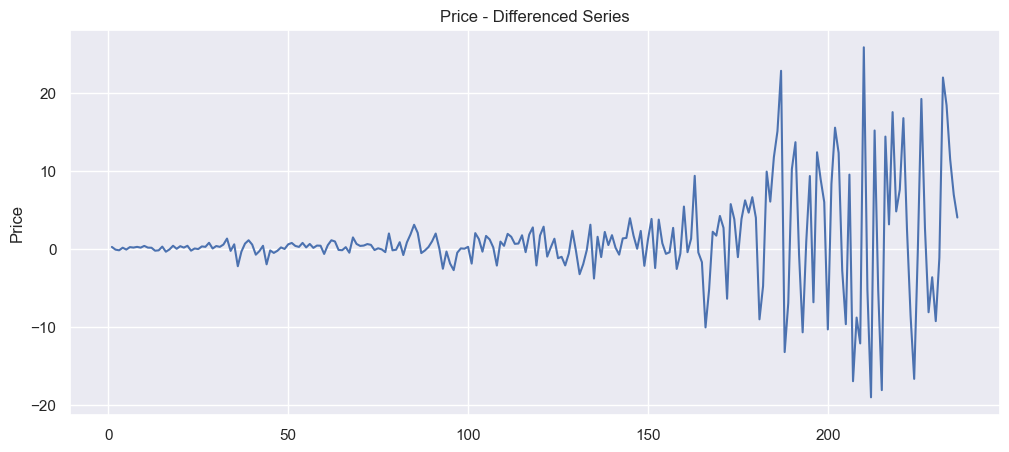

In [162]:
plt.figure(figsize = [12, 5]); 
df_apnew1['Price First Difference'].plot()
plt.title('Price - Differenced Series')
plt.ylabel('Price')
plt.grid(True)

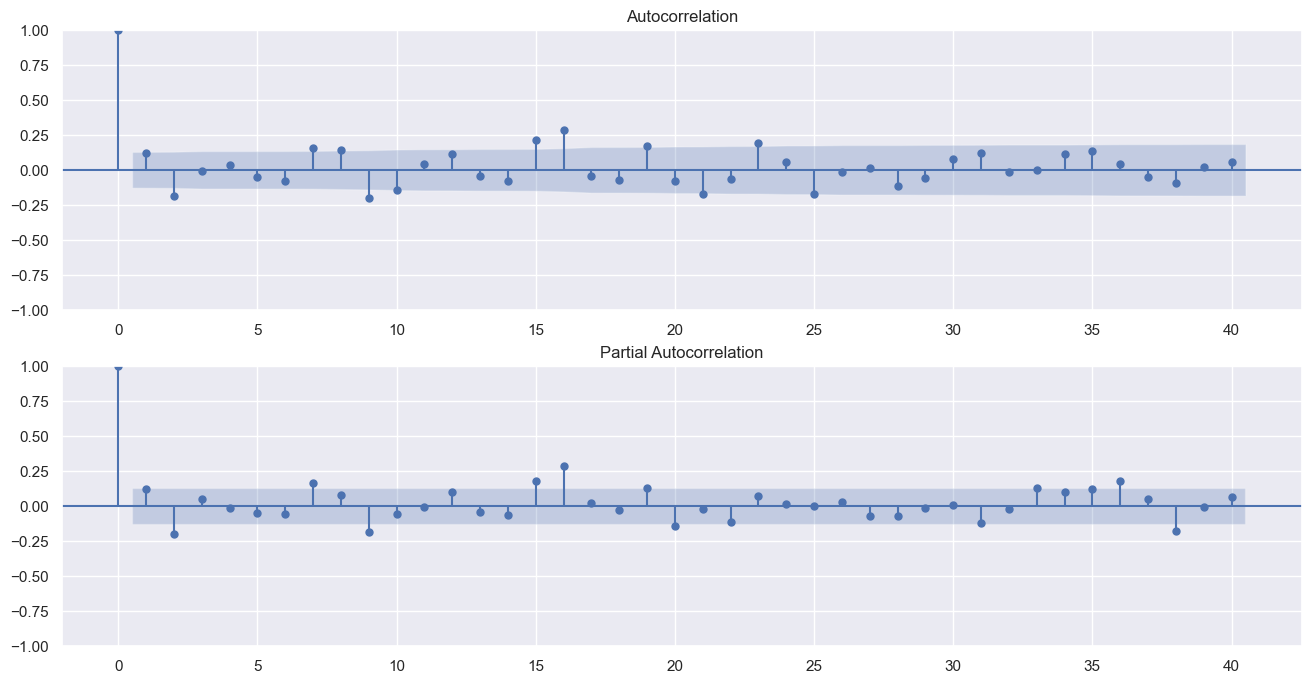

In [163]:
import statsmodels.api as sm
fig = plt.figure(figsize = (16, 8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df_apnew1['Price First Difference'].dropna(),lags = 40,ax = ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df_apnew1['Price First Difference'].dropna(),lags = 40,ax = ax2)

In [164]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima.model import ARIMA

aicVal=[]
for d in range(1,3):
    for ari in range(0, 3):
        for maj in range(0,3):
            try:
                arima_obj = ARIMA(df_apnew1['Close'], order=(ari,d,maj))
                arima_obj_fit=arima_obj.fit()
                aicVal.append([ari, d, maj, arima_obj_fit.aic])
            except ValueError:
                pass
print(aicVal)

[[0, 1, 0, 1515.852320431954], [0, 1, 1, 1510.5728884414657], [0, 1, 2, 1506.7567187817444], [1, 1, 0, 1513.1027784760595], [1, 1, 1, 1508.4205346742262], [1, 1, 2, 1508.7564135068324], [2, 1, 0, 1507.3946693282644], [2, 1, 1, 1508.4386959818037], [2, 1, 2, 1499.3668595266236], [0, 2, 0, 1636.6191191063022], [0, 2, 1, 1509.0165844376984], [0, 2, 2, 1506.5339667585185], [1, 2, 0, 1612.172463258025], [1, 2, 1, 1508.4469678463388], [1, 2, 2, 1503.449942004942], [2, 2, 0, 1566.632998781026], [2, 2, 1, 1498.8129484665287], [2, 2, 2, 1500.6637720215404]]


In [165]:
best_model = SARIMAX(df_apnew1['Close'], order = (2, 1, 2), seasonal_order = (2, 1, 2, 12)).fit(dis = -1)

print(best_model.summary())

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.15773D+00    |proj g|=  1.16096D-01


 This problem is unconstrained.



At iterate    5    f=  3.07347D+00    |proj g|=  5.11182D-02

At iterate   10    f=  3.06704D+00    |proj g|=  9.88961D-03

At iterate   15    f=  3.06199D+00    |proj g|=  5.02350D-03

At iterate   20    f=  3.05949D+00    |proj g|=  1.74700D-03

At iterate   25    f=  3.05945D+00    |proj g|=  6.35410D-04

At iterate   30    f=  3.05931D+00    |proj g|=  4.41403D-04

At iterate   35    f=  3.05930D+00    |proj g|=  3.07773D-04

At iterate   40    f=  3.05929D+00    |proj g|=  8.92432D-04

At iterate   45    f=  3.05928D+00    |proj g|=  7.86594D-04

At iterate   50    f=  3.05922D+00    |proj g|=  2.96226D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

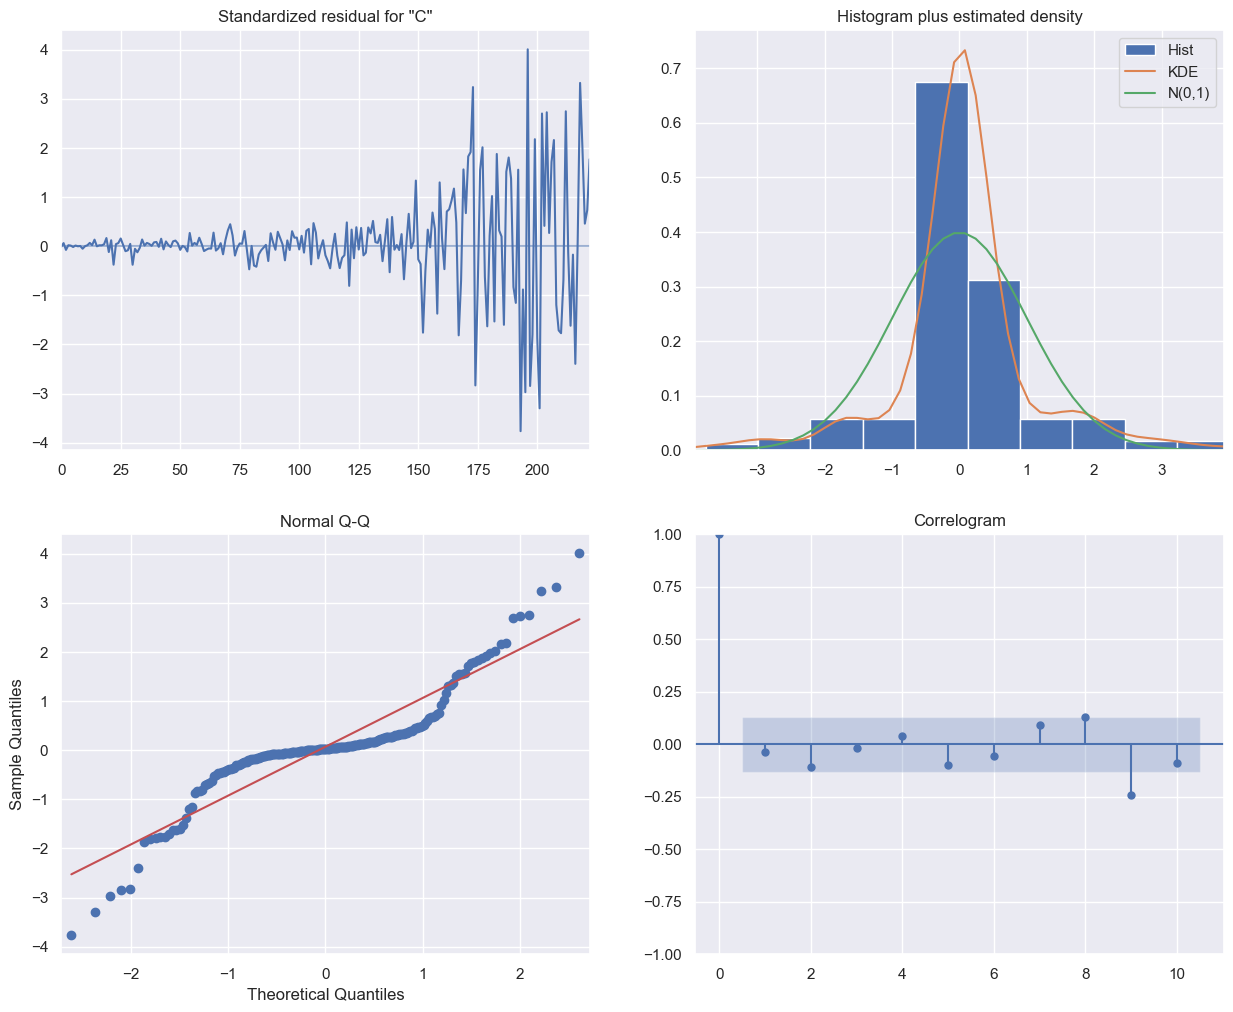

In [166]:
best_model.plot_diagnostics(figsize = (15, 12))
plt.show()

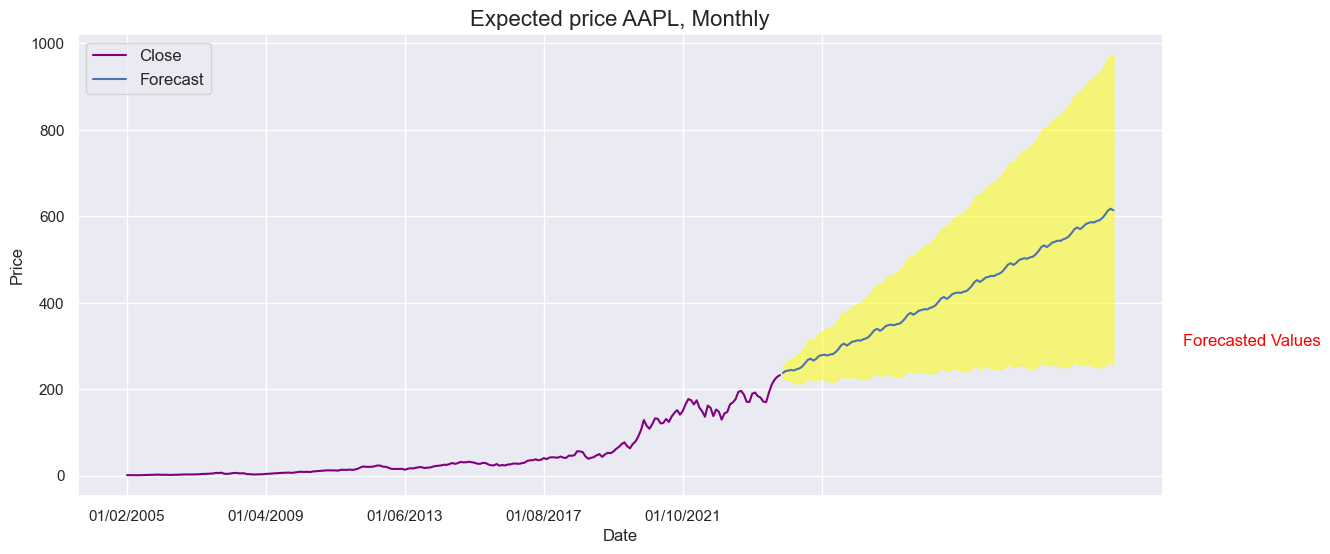

In [167]:
forecast_values = best_model.get_forecast(steps = 120)

forecast_ci = forecast_values.conf_int()

ax = df_apnew1.plot(x = 'Date', y = 'Close', figsize = (14, 6), legend = True, color = 'purple')

forecast_values.predicted_mean.plot(ax = ax, label = 'Forecast', figsize = (14, 6), grid = True)

ax.fill_between(forecast_ci.index,
                forecast_ci.iloc[: , 0],
                forecast_ci.iloc[: , 1], color = 'yellow', alpha = .5)
plt.title('Expected price AAPL, Monthly', size = 16)
plt.ylabel('Price', size = 12)
plt.legend(loc = 'upper left', prop = {'size': 12})
ax.axes.get_xaxis().set_visible(True)

ax.text(380, 300, 'Forecasted Values', fontsize = 12,  color = 'red')
plt.show()

In [168]:
train = df_apnew1[:int(0.85 * (len(df_apnew1)))]
test  = df_apnew1[int(0.85 * (len(df_apnew1))):]

train.shape, test.shape

((200, 8), (36, 8))

In [169]:
train.head()

Date      Open      High       Low     Close  Adj Close       Volume  \
1  01/02/2005  1.375893  1.622857  1.367500  1.602143   1.352970  21448946400   
2  01/03/2005  1.606786  1.611071  1.386786  1.488214   1.256760  14675920000   
3  01/04/2005  1.503214  1.587500  1.214286  1.287857   1.087564  19375518400   
4  01/05/2005  1.293214  1.462143  1.182500  1.420000   1.199155  12858294400   
5  01/06/2005  1.424643  1.455714  1.268571  1.314643   1.110183  11327195600   

   Price First Difference  
1                0.228929  
2               -0.113929  
3               -0.200357  
4                0.132143  
5               -0.105357

In [170]:
start = len(train)
end   = len(train) + len(test) - 1
predictions = best_model.predict(start = start, end = end, dynamic = False, typ = 'levels').rename('SARIMA Predictions')
print(predictions)

201    140.712577
202    154.474639
203    169.311739
204    179.764369
205    172.048145
206    165.272311
207    180.243585
208    154.132568
209    154.553315
210    138.473481
211    174.295251
212    148.962346
213    140.279179
214    159.187474
215    149.731573
216    128.091820
217    144.931582
218    148.554409
219    168.068276
220    166.967914
221    181.014872
222    203.618624
223    198.149233
224    181.836594
225    174.872804
226    173.486117
227    193.253183
228    194.115111
229    181.786369
230    185.846791
231    169.543769
232    172.320305
233    198.778248
234    219.330434
235    224.604320
236    222.389589
Name: SARIMA Predictions, dtype: float64


In [171]:
evaluation_results = pd.DataFrame({'r2_score': r2_score(test['Close'], predictions)}, index = [0])

evaluation_results['mean_absolute_error'] = mean_absolute_error(test['Close'], predictions)
evaluation_results['mean_squared_error'] = mean_squared_error(test['Close'], predictions)
evaluation_results['root_mean_squared_error'] = np.sqrt(mean_squared_error(test['Close'], predictions))
evaluation_results['mean_absolute_percentage_error'] = np.mean(np.abs(predictions - test['Close'])
                                                               /np.abs(test['Close']))*100 
evaluation_results

r2_score  mean_absolute_error  mean_squared_error  root_mean_squared_error  \
0  0.757083             10.43616          147.401304                12.140894   

   mean_absolute_percentage_error  
0                         6.29808